# Финальный проект:<br>Банки — cегментация пользователей по потреблению

## <a id="1"></a>Цели и задачи
[К содержанию](#0)

__Цель исследования__<br>
Выяснить причину оттока клиентов банка и составить рекомендации по их удержанию.<br><br>
__Задача__<br>
Проанализировать клиентов регионального банка "Метанпромбанк", расположенного в Ярославле и областных городах: Ростове Великом и Рыбинске для сегментации пользователей по количеству потребляемых продуктов. Главной задачей будет определение особенностей потребления продуктов клиентами, что позволит не только выявить популярные услуги, но также составить портрет клиентов, подверженных оттоку из банка.<br><br>
__Презентация__<br>
https://disk.yandex.ru/i/nKttmyFROoeBLg

## <a id="2"></a>Шаги
[К содержанию](#0)

1. Загрузка данных:
   - Импорт необходимых библиотек. 
   - Загрузка набора данных с информацией о клиентах банка "Метанпромбанк".


2. Предподготовка данных:
   - Изучение и оценка данных.
   - Поиск пропущенных значений, их оценка и обработка.
   - Проверка соответствия типов данных и приведение их.
   - Кодировка категориальных признаков.
   - Поиск и обработка дубликатов.
   - Проверка корректности наименований колонок и переименование.


3. Исследовательский анализ:
   - Анализ общего распределения клиентов по количеству продуктов.
   - Составление портрета клиента.
   - Визуализация данных для лучшего понимания.
   - Прогнозирование использования продуктов:
     - Построение предположений об оттоке клиентов в разных сегментах без изменения положения.
     - Построение предположений о том, какие продукты могут использовать клиенты в каждом сегменте.
   - Изучение доли оттока в каждом из сегментов.
   - Изучение оттока по географическим признакам.
   - Проверка статистических гипотез:
     - Формулирование гипотез, например, о различии возраста между клиентами, использующими два продукта банка и один продукт, или об оттоке клиентов только с одним продуктом.
     - Обоснование и выбор стат. теста.
     - Проверка и интерпретация результатов.


4. Сегментация клиентов:
   - Кластеризация для выделения групп клиентов по количеству потребляемых продуктов.
   - Разделение пользователей на более компактные сегменты и исследование отличительных черт каждой группы.


5. Выводы:
   - Суммирование результатов анализа.
   - Выявление основных закономерностей в оттоке и потреблении продуктов.
   - Создание рекомендаций для уменьшения оттока и увеличения использования продуктов.


6. Подготовка презентации  в формате pdf.


## <a id="3"></a>Описание данных
[К содержанию](#0)

Датасет: https://code.s3.yandex.net/datasets/bank_scrooge.csv<br>
Датасет содержит данные о клиентах банка «Метанпромбанк», который располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:<br>
`USERID` — идентификатор пользователя,<br>
`score` — баллы кредитного скоринга,<br>
`city` — город,<br>
`gender` — пол,<br>
`age` — возраст,<br>
`equity` — количество баллов собственности,<br>
`balance` — баланс на счёте,<br>
`products` — количество продуктов, которыми пользуется клиент,<br>
`credit_card` — есть ли кредитная карта,<br>
`last_activity` — активный клиент,<br>
`EST_SALARY` — оценочный доход клиента,<br>
`сhurn` — признак оттока.

## <a id="4"></a>Загрузка и изучение данных
[К содержанию](#0)

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans, MeanShift
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import itertools
from multiprocessing import Pool
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.cluster import KMeans
import seaborn as sns
import datetime as dt
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind, chi2_contingency, shapiro, pearsonr, mannwhitneyu, fisher_exact
from statsmodels.stats.weightstats import ztest
import math as mth
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Получаем датасет
file_path = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'
df = pd.read_csv(file_path)

In [3]:
# Функция получения полной информации о датафрейме
def data_info (data):
    print('\033[1m' + 'Первые 10 строк:' + '\033[0m')
    display(data.head(10))
    print('-------------')
    print('\033[1m' + 'Последние 10 строк:' + '\033[0m')
    display(data.tail(10))
    print('-------------')
    print('\033[1m' + 'Типы данных:' + '\033[0m')
    display(data.info(memory_usage='deep'))
    print('-------------')
    print('\033[1m' + 'Полное статистическое описание:' + '\033[0m')
    display(data.describe(include = "all"))
    print('-------------')
    print('\033[1m' + 'Категориальные признаки:' + '\033[0m')
    display(data.describe(include=[object]))
    print('-------------')
    print('\033[1m' + 'Пропуски:' + '\033[0m')
    # Обход всех столбцов и проверка наличия пропущенных значений
    for i in data.columns:
        if data[i].isna().sum() > 0:
            print(f"Столбец {i} имеет {data[i].isna().sum()} пропусков\n")
        else:
            print(f"В столбце {i} пропусков НЕТ\n")
    print('-------------')
    print('\033[1m' + 'Доля пропусков от всех данных:' + '\033[0m')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('-------------')
    print('\033[1m' + 'Явные дубликаты:' + '\033[0m')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Явных дублей НЕТ')

data_info(df)


Первые 10 строк:



,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


-------------

Последние 10 строк:



,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9990,162357,822.0,Ярославль,М,31.0,3,646575.17,1,1,1,88297.63,0
9991,122366,840.0,Ярославль,Ж,44.0,3,326619.71,1,1,0,157589.59,0
9992,167165,813.0,Рыбинск,М,48.0,2,179765.62,2,1,0,133972.11,1
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9994,114186,851.0,Ростов,М,42.0,3,370912.79,2,1,0,102123.93,1
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


-------------

Типы данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.5 MB


None

-------------

Полное статистическое описание:



,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,10000,10000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5888,5005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,171814.71260,848.699400,NaN,NaN,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,NaN,NaN,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,NaN,NaN,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,NaN,NaN,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,NaN,NaN,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,NaN,NaN,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000


-------------

Категориальные признаки:



,city,gender
count,10000,10000
unique,3,2
top,Ярославль,М
freq,5888,5005


-------------

Пропуски:

В столбце USERID пропусков НЕТ

В столбце score пропусков НЕТ

В столбце city пропусков НЕТ

В столбце gender пропусков НЕТ

Столбец age имеет 26 пропусков

В столбце equity пропусков НЕТ

Столбец balance имеет 2295 пропусков

В столбце products пропусков НЕТ

В столбце credit_card пропусков НЕТ

В столбце last_activity пропусков НЕТ

В столбце EST_SALARY пропусков НЕТ

В столбце churn пропусков НЕТ

-------------

Доля пропусков от всех данных:


balance          22.95
age               0.26
USERID            0.00
score             0.00
city              0.00
gender            0.00
equity            0.00
products          0.00
credit_card       0.00
last_activity     0.00
EST_SALARY        0.00
churn             0.00
dtype: float64

-------------

Явные дубликаты:

Явных дублей НЕТ


### <a id="4_1"></a>Картина данных
[К содержанию](#0)<br><br>
В таблице 10 тысяч строк и 12 столбцов. По данным имеем такую картину:<br>
- кредитный рейтинг вариьируется от 350 до 850;
- возраст -  от 18 до 92 лет, средний и медианный возраст клиентов имеет небольшую разницу и равны 42-43 и 40 лет соответственно;
- баллы собственности от 0 до 10, в среднем 5;
- баланс на счёте от 0 до 120 млн руб., средняя и медианная величины различаются, значит будут выбросы;
- доходы клиентов от 2000 руб. до 1.4 млн руб., среднее - почти 148 тыс. руб., медиана - почти 120 тыс. руб.<br>

Названия столбцов нужно привести к принятому виду.<br>

По типам данных в столбцах:
- `gender`, `credit_card`, `last_activity`, `churn` - должны иметь булевой тип;
- `USERID` - максимальное значение 229145, значит в uint32;
- `score` - максимум баллов, значит в uint16;
- `age` - врядли человек живёт больше 255 лет, поэтому в uint8, но сначала пропуски заменим на медиану;
- `equity` - баллы собственности не целые могут быть, значит в float32;
- `products` - количество продуктов, значит к целочисленному типу.
- остальные данные оставим без изменений.
<br>

Явных дубликатов в данных не обюнаружено, будем искать неявные. В столбце balance отсутсвует 23% данных, а в age - 0.26%. Изучим природу пропусков и проверим возможность замены.<br>

### <a id="4_2"></a>Предподготовка данных
[К содержанию](#0)<br><br>

In [4]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

In [5]:
# Преобразование типов данных в столбцах
df['credit_card'] = df['credit_card'].astype('bool')
df['last_activity'] = df['last_activity'].astype('bool')
df['churn'] = df['churn'].astype('bool')
df['gender'] = df['gender'].apply(lambda x: True if x == 'M' or x == 'М' else False) # вдруг кодировка разная
df['userid'] = df['userid'].astype('uint32')
df['score'] = df['score'].astype('uint16')
df['equity'] = df['equity'].astype('float32')
df['products'] = df['products'].astype('uint8')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  uint32 
 1   score          10000 non-null  uint16 
 2   city           10000 non-null  object 
 3   gender         10000 non-null  bool   
 4   age            9974 non-null   float64
 5   equity         10000 non-null  float32
 6   balance        7705 non-null   float64
 7   products       10000 non-null  uint8  
 8   credit_card    10000 non-null  bool   
 9   last_activity  10000 non-null  bool   
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  bool   
dtypes: bool(4), float32(1), float64(3), object(1), uint16(1), uint32(1), uint8(1)
memory usage: 459.1+ KB


Преобразование типов данных позволило уменьшить требуемые для датафрейма ресурсы (память) в 5 раз.

Посмотрим на колонку `products`, всё ли там в порядке. А вдруг там пропуски есть.

In [6]:
# Найдём все уникальные значения в столбце 'products' и посчитаем пропуски
print("Все уникальные значения в столбце 'products':")
print(df['products'].unique())
print("\nКоличество пропущенных значений в столбце 'products':", df['products'].isnull().sum())

Все уникальные значения в столбце 'products':
[2 3 1 4 5 0]

Количество пропущенных значений в столбце 'products': 0


Пропусков нет, но есть значение 0, то есть клиент, который не пользуется ни одним продуктом банка. Надо провериить, что это.

In [7]:
# Подсчет количества строк, где 'products' равно 0
print("Количество строк, где 'products' равно 0: ", len(df[df['products'] == 0]))

Количество строк, где 'products' равно 0:  1


У нас одна строка, где записаны данные клиента, у которого нет ни одного продукта банка.

In [8]:
# Вывод строк, где 'products' равно 0
products_zero_rows = df[df['products'] == 0]
products_zero_rows

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,False,79.0,3.0,NaN,0,False,False,25063.96,True


Мы получили 79-летнюю пенсионерку из Рыбинска с ID 147837, у которой 962 балла кредитного рейтинга, доход чуть выше 25 тыс. руб. и 3 очка оценки собственности. Пока трогать её не будем, может эта запись исчезнет при чистке данных.

Теперь поработаем с колонкой `age`, где есть пропуски, хотя их и не много.

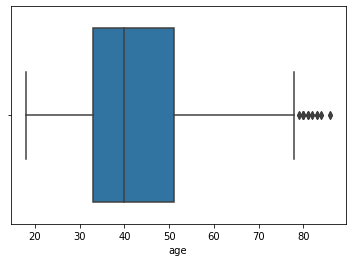

In [9]:
# Посмотрим на диаграмму размаха и определим выбросы в возрасте
for column in ['age']:
    plt.figure()
    sns.boxplot(x=column, data=df)
    plt.show();

Здеась видно, что клиенты старше 78 лет - это аномалия. Проверим поточнее.

In [10]:
# Получим уникальные целые значения в столбце 'age', которые больше 75
unique_ages = df[df['age'] > 75]['age'].unique()

# Посчмтаем количество записей и процент для каждого возраста больше 75
for age in sorted(unique_ages):
    count = len(df[df['age'] == age])
    percent = count / len(df) * 100
    print(f"Значение возраста: {age}, количество записей: {count}, процент от общего числа: {percent}%")

Значение возраста: 76.0, количество записей: 13, процент от общего числа: 0.13%
Значение возраста: 77.0, количество записей: 8, процент от общего числа: 0.08%
Значение возраста: 78.0, количество записей: 6, процент от общего числа: 0.06%
Значение возраста: 79.0, количество записей: 2, процент от общего числа: 0.02%
Значение возраста: 80.0, количество записей: 7, процент от общего числа: 0.06999999999999999%
Значение возраста: 81.0, количество записей: 4, процент от общего числа: 0.04%
Значение возраста: 82.0, количество записей: 2, процент от общего числа: 0.02%
Значение возраста: 83.0, количество записей: 3, процент от общего числа: 0.03%
Значение возраста: 84.0, количество записей: 2, процент от общего числа: 0.02%
Значение возраста: 86.0, количество записей: 2, процент от общего числа: 0.02%


Можно назвать аномалией клиентов старше 77 лет включительно, но в контексте возраста аномалией будут значения выше 100 лет или меньше 18 лет. Удалять записи с клиентами, где возраст больше 77 не будем, потому что они всё также являются клиентами банка.

In [11]:
# Преобразуем в столбце 'age' в числовой тип данных, а пропуски заменяем на медиану
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)

# Преобразуем в нужный тип данных
df['age'] = df['age'].astype('uint8')


In [12]:
# Вывод количества строк в датафрейме df
print(f"Количество строк в датафрейме после чистки: {len(df)}")

Количество строк в датафрейме после чистки: 10000


Поработаем с дубликатами.<br>
Где могут быть критичные неявные дубли? Нас интересует 4 колонки: ID клиента, пол, возраст, город, и желательно в совпадении.

In [13]:
df.duplicated(['userid','gender', 'age', 'city']).sum()

0

Таких дублей нет. Проверим по ID клиента из одного города, миожет один человек в разных городах, вдруг чо...

In [14]:
# Проверим дубли пользователй из одного города
df.duplicated(['userid','city']).sum()

0

Нет таких дублей. Убираем город.

In [15]:
df.duplicated(['userid','gender', 'age']).sum()

3

А вот и появились дубликаты, аж целых три. Будем изучать.

In [16]:
# Посмотрим на дубли
df[df.duplicated(['userid','gender', 'age'], False)]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863,Ярославль,True,30,5.0,1036114.50,5,True,True,150744.50,True
3668,185829,925,Рыбинск,True,40,0.0,NaN,1,True,False,228305.64,False
5197,155765,923,Рыбинск,True,30,0.0,NaN,1,True,True,120296.60,False
8205,227795,840,Рыбинск,True,34,2.0,350768.03,1,True,False,102036.14,True
8497,227795,839,Ярославль,True,34,2.0,326593.14,2,True,False,103314.92,False
9632,185829,927,Ярославль,True,40,0.0,NaN,1,True,False,231254.86,False


У нас три повтора `userid`: 155765, 185829 и 227795. Но что интересно, очень мало параметров совпадает. Только возраст, наличие кредитки, показатель активности и всё. Главные параметры не совпадают.

In [17]:
# Получим процент дубликатов в столбце 'userid'
print("Доля дубликатов в столбце 'userid': {:.2f}%".format(df['userid'].duplicated().sum() / len(df) * 100))

Доля дубликатов в столбце 'userid': 0.73%


Дубликатов из одного города нет, а данные по общему полю `user_id` содержит противоречивую информацию. В общем, это не дубликаты клиентов, потому что видна явная разница по остальным параметрам.Вероятно, что дубликаты `user_id` получились при выгрузке данных из разных источников.<br>
Вообще поле `user_id` нам не нужно для анализа, оставим как есть.

Теперь изучим пропуски в `balance`. Для этого создадим отдельный датафрэйм с ними и поищем закономерности, потом попробуем заменить пропуски логически подходящими значениями.

In [18]:
df_mis = df.query('balance.isna()')
df_mis.sample(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3940,139819,892,Ярославль,True,50,0.0,NaN,2,True,True,94260.58,False
2445,124818,924,Ярославль,False,24,0.0,NaN,2,True,True,145060.45,False
8570,115263,891,Рыбинск,True,53,0.0,NaN,1,True,True,117873.30,False
698,205548,918,Рыбинск,False,54,0.0,NaN,1,True,True,286934.81,False
4133,133434,736,Ярославль,True,33,0.0,NaN,1,True,True,202648.00,False
544,176246,685,Ростов,True,37,0.0,NaN,2,True,True,106887.86,False
2165,187635,692,Рыбинск,False,40,0.0,NaN,1,True,True,160368.82,False
1372,144666,718,Ярославль,True,36,0.0,NaN,1,True,True,734129.16,False
7064,121373,898,Рыбинск,True,33,0.0,NaN,1,True,False,154614.59,False
298,212688,697,Ярославль,True,30,0.0,NaN,2,True,False,270318.69,False


In [19]:
# Посмотрим относительное распредление пропусков по городу, количеству продуктов, активности и оттоку
for i in ['city','products','credit_card','last_activity', 'churn']:
    print(i)
    print(round(df_mis[i].value_counts(normalize=True),2))
    print()    

city
Ярославль    0.64
Рыбинск      0.26
Ростов       0.10
Name: city, dtype: float64

products
1    0.85
2    0.14
3    0.01
0    0.00
Name: products, dtype: float64

credit_card
True     0.82
False    0.18
Name: credit_card, dtype: float64

last_activity
True     0.55
False    0.45
Name: last_activity, dtype: float64

churn
False    0.99
True     0.01
Name: churn, dtype: float64



Мы видим, что пропуски в `balance` чаще всего у клиентов с одним продуктом, и в 99% случаев это действующие клиенты банка, в 82% с кредитной картой. Большая часть таких клиентов - 64% - из Ярославля, четверть - из Рыбинска и только 10% из Ростова.<br>
Построим графики распределения по рейтингу, возрасту, доходу и баллам собственности.

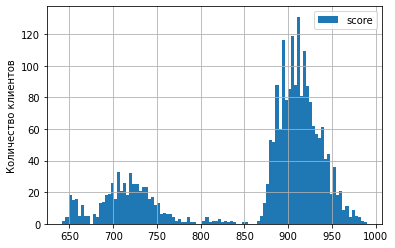

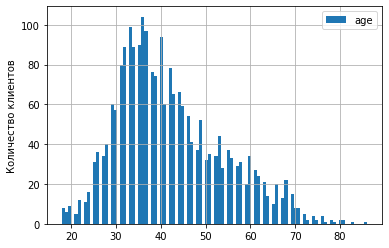

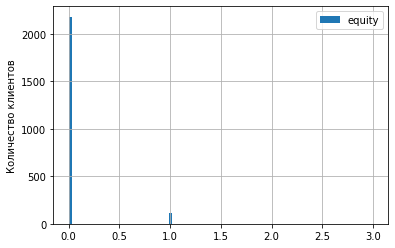

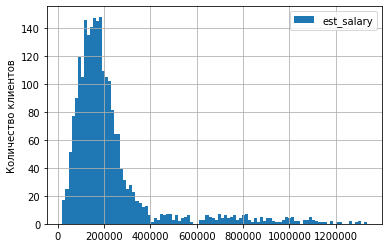

In [20]:
for i in ['score', 'age', 'equity', 'est_salary']:
    bins = int(np.sqrt(len(df))) # найдём количество корзин методом Square Root
    df_mis.plot(y = i, kind = 'hist', bins = bins, grid = True)
    plt.ylabel('Количество клиентов')
    plt.ticklabel_format(style='plain', axis='x')

На графиках не видно явной зависимости пропусков от рейтинга, возраста, дохода и баллам собственности - все значения отличаются, значит это не техническая ошибка и не логическая связь.<br>
Создадим новый параметр `balance_na` и посмотрим на его связи с другими данными.

In [22]:
# Создаём столбец 'balance_na' с булевыми значениями
df['balance_na'] = df['balance'].isna().astype(bool)

# Проверим корреляцию и отсортируем результаты
print(df.corrwith(df['balance_na']).sort_values(key=abs, ascending=False).apply('{:.2f}'.format))

balance_na        1.00
equity           -0.71
products         -0.49
est_salary        0.31
churn            -0.25
credit_card       0.16
score             0.14
gender            0.06
age              -0.03
last_activity     0.03
userid            0.00
balance            nan
dtype: object


Упс... Видим обратную корреляцию с баллами собственности (`equity`), количеством продуктов (`products`) и признаком оттока (`churn`). В принципе, это может быть показатель новых пользователей, у которых только один продукт, например, дебетовый счёт, и оценки собственности.<br>
При этом видна существенная взаимосвязь с наличием кредитной карты (`credit_card`) и оценкой дохода (`est_salary`), что опять же может говорить о новых клиентах с одним продуктом - кредиткой без дебетового счёта.<br>
В основном, видно много разных связей без чёткой логики, поэтому выделить какую-то зависимость пропусков от других данных не получается. То есть нельзя выделить какой-то один сегмент с линейной зависимостью для заполнения пропусков.<br>
Пропуски в `balance` оставляем без изменений.

Ниже сделаем расчёт корреляции по признаку пропуска, а сейчас сравним значение одного и того же признака в разрезе наличия или отсутствия данных по балансу.

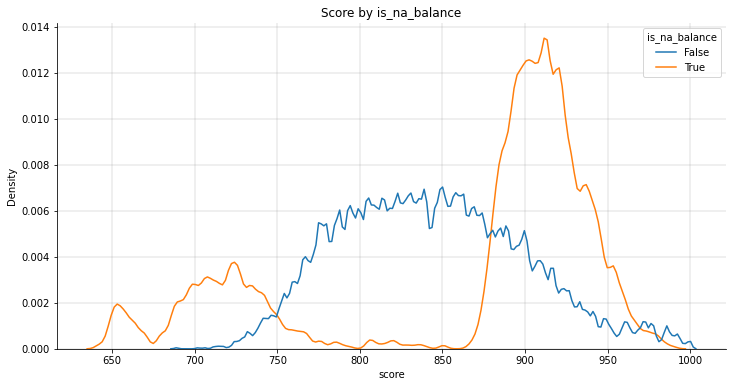

In [21]:
# Строи сравнительный график
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=df.assign(is_na_balance=lambda row: row["balance"].isna()),
           x="score", hue="is_na_balance", 
            common_norm=False,
           ax=ax,
           bw_adjust=0.125)
ax.grid( color='grey', lw=0.25)
ax.set_title("Оценка параметра отсутствия баланса")
plt.show();

Из графика понятно, что есть какая-то нелинейная связь между клиентами с балансом и без - это главное, значит пропуски в данных не случайны.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  uint32 
 1   score          10000 non-null  uint16 
 2   city           10000 non-null  object 
 3   gender         10000 non-null  bool   
 4   age            10000 non-null  uint8  
 5   equity         10000 non-null  float32
 6   balance        7705 non-null   float64
 7   products       10000 non-null  uint8  
 8   credit_card    10000 non-null  bool   
 9   last_activity  10000 non-null  bool   
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  bool   
 12  balance_na     10000 non-null  bool   
dtypes: bool(5), float32(1), float64(2), object(1), uint16(1), uint32(1), uint8(2)
memory usage: 400.5+ KB


In [24]:
# Функция для определения выбросов и аномалий в разных столбцах
def detect_outliers_and_anomalies(df, columns):
    total_rows = len(df)
    outliers = pd.DataFrame()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_column])
    
    total_outliers = len(outliers)
    percentage_outliers = (total_outliers / total_rows) * 100
    
    return outliers, total_outliers, percentage_outliers

In [25]:
# Удаление пропущенных значений в столбце 'balance'
df_cleaned = df.dropna(subset=['balance'])

# Используем функцию
columns_to_check = ['balance']
outliers, total_outliers, percentage_outliers = detect_outliers_and_anomalies(df, columns_to_check)

print(f"Всего выбросов и аномалий в столбце 'balance': {total_outliers}")
print(f"Процент выбросов и аномалий от общего числа строк: {percentage_outliers:.2f}%")

Всего выбросов и аномалий в столбце 'balance': 428
Процент выбросов и аномалий от общего числа строк: 4.28%


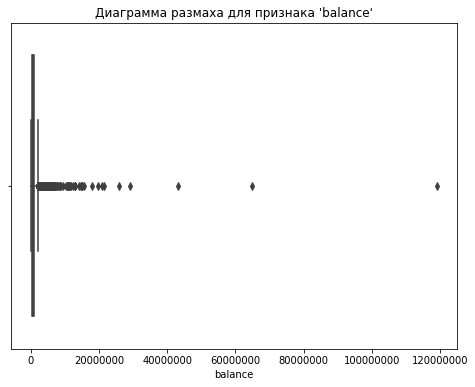

In [26]:
# Строим диаграмму размаха для столбца 'balance'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Диаграмма размаха для признака 'balance'")
plt.show()

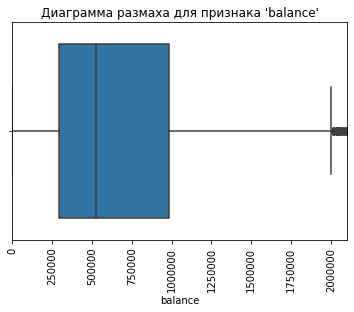

In [27]:
# Ограничим диаграмму размаха 'balance' до 2,1 млн
sns.boxplot(x=df['balance'])
plt.xlim(0, 2100000)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.title("Диаграмма размаха для признака 'balance'")
plt.show()

Здесь мы видим, что суммы на счетах больше 2 млн являются аномалиями. Таких выбросов насчитывается 427 строк, или 4,27% от всего датасета. В принципе, их можно удалить, но перед этим посмотрим, сколько из них подвержены оттоку.

In [28]:
# Найдём записи в новом датафрейме, где признак оттока положительный и  вычислим их долю
print(f"Доля записей с 'churn' равным True от общего количества в outliers: {len(outliers[outliers['churn'] == True]) / len(outliers) * 100:.2f}%")

Доля записей с 'churn' равным True от общего количества в outliers: 49.07%


Подверженных оттоку 49.18% от всех клиентов с аномальными значениями баланса. Это много, почти 2,5% от всех клиентов - удалять не будем.

In [29]:
# Вывод количества строк в датафрейме df
print(f"Количество строк в датафрейме после чистки: {len(df)}")

Количество строк в датафрейме после чистки: 10000


Небольшие потери, ничего критичного нет.<br>
То же самое проделаем с данными в `est_salary` - оценочный доход клиента, вдруг и там аномалии есть.

In [30]:
# Используем функцию
columns_to_check = ['est_salary']
outliers, total_outliers, percentage_outliers = detect_outliers_and_anomalies(df, columns_to_check)

print(f"Всего выбросов и аномалий в столбце 'est_salary': {total_outliers}")
print(f"Процент выбросов и аномалий от общего числа строк: {percentage_outliers:.2f}%")

Всего выбросов и аномалий в столбце 'est_salary': 482
Процент выбросов и аномалий от общего числа строк: 4.82%


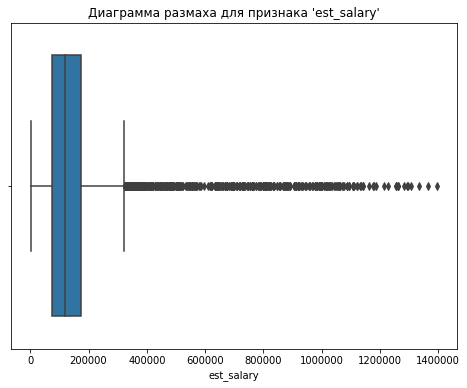

In [31]:
# Строим диаграмму размаха для столбца 'est_salary'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['est_salary'])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Диаграмма размаха для признака 'est_salary'")
plt.show()

Здесь видно, что суммы доходы выше 300 тыс. являются выбросами, и их насчитывается 393, или 4,12% от оставшегося датасета.

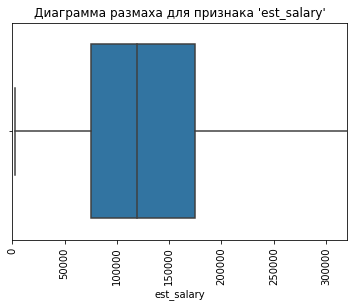

In [32]:
# Ограничим диаграмму размаха 'est_salary' до 320 тысяч
sns.boxplot(x=df['est_salary'])
plt.xlim(0, 320000)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.title("Диаграмма размаха для признака 'est_salary'")
plt.show()

In [33]:
# Вывод количества строк в датафрейме df
print(f"Количество строк в датафрейме после чистки: {len(df)}")

Количество строк в датафрейме после чистки: 10000


In [34]:
# Проверим уникальные города и количество записей с ними
print("Уникальные значения в столбце 'city' и их количество:")
print(df['city'].value_counts())

Уникальные значения в столбце 'city' и их количество:
Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64


In [35]:
# Применим One-Hot Encoding к столбцу 'city'
city_dummies = pd.get_dummies(df['city'], prefix='city')

# Объединяем исходный датафрейм с One-Hot Encoding для 'city'
df = pd.concat([df, city_dummies], axis=1)

# Удаление столбца 'city'
#df = df.drop('city', axis=1)

# Приведём тип данных в новых столбцах к булевому
for col in city_dummies.columns:
    df[col] = df[col].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          10000 non-null  uint32 
 1   score           10000 non-null  uint16 
 2   city            10000 non-null  object 
 3   gender          10000 non-null  bool   
 4   age             10000 non-null  uint8  
 5   equity          10000 non-null  float32
 6   balance         7705 non-null   float64
 7   products        10000 non-null  uint8  
 8   credit_card     10000 non-null  bool   
 9   last_activity   10000 non-null  bool   
 10  est_salary      10000 non-null  float64
 11  churn           10000 non-null  bool   
 12  balance_na      10000 non-null  bool   
 13  city_Ростов     10000 non-null  bool   
 14  city_Рыбинск    10000 non-null  bool   
 15  city_Ярославль  10000 non-null  bool   
dtypes: bool(8), float32(1), float64(2), object(1), uint16(1), uint32(1), uint8(2)

In [36]:
df.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_na,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,Рыбинск,False,25,1.0,59214.82,2,False,True,75719.14,True,False,False,True,False
1,146556,861,Рыбинск,False,37,5.0,850594.33,3,True,False,86621.77,False,False,False,True,False
2,120722,892,Рыбинск,False,30,0.0,NaN,1,True,True,107683.34,False,True,False,True,False
3,225363,866,Ярославль,False,51,5.0,1524746.26,2,False,True,174423.53,True,False,False,False,True
4,157978,730,Ярославль,True,34,5.0,174.00,1,True,False,67353.16,True,False,False,False,True


### <a id="4_3"></a>Промежуточный вывод
[К содержанию](#0)

В ходе предобработки данных:
1. переименованы столбцы `USERID` и `EST_SALARY`;
2. изменены типы данных в нескольких столбцах, что позволило сократить требвания к оборудованию;
3. явных дубликатов не обнаружено, а найденые неявные значения не имеют;
4. проанализированы дубликаты в столбце `user_id` и оставлены безизменений;
5. пропуски в столбце `age` заменены медианой, а также изучены выбросы;
6. пропуски в столбце `balance` оставлены без изменений, потому что логичной замены не обнаружено;
7. также в столбце `balance` найдены аномалии и выбросы, остапвалены для проверки;
8. столбец `city` перекодирован для удобства дальнейший расчётов;
9. выбросы и аномалии составляют 8.6% данных, удаление которых исказит результаты - не удалялись.

## <a id="5"></a>Исследовательский анализ
[К содержанию](#0)

### <a id="5_1"></a>Распределение клиентов по количеству продуктов
[К содержанию](#0)

Посмотрим, как распределеяются клиенты по количеству продуктов и наличию кредитной карты, как продукта.

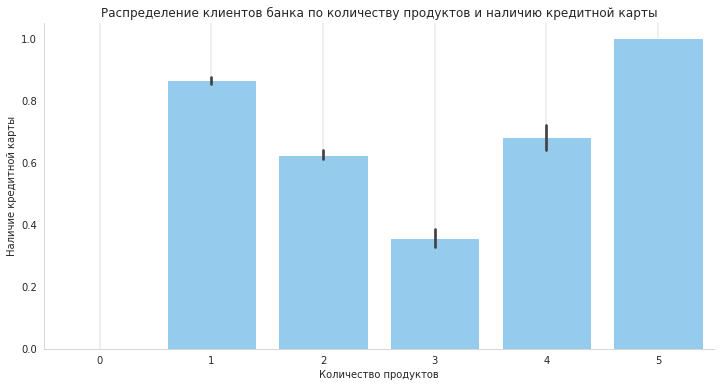

In [38]:
# Создаём столбчатую диаграмму с группировкой по количеству продуктов и наличию кредитной карты
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.barplot(data=df, x="products", y="credit_card", color="lightskyblue", ax=ax)
ax.grid(color='grey', lw=0.25)

plt.xlabel('Количество продуктов')
plt.ylabel('Наличие кредитной карты')
plt.title('Распределение клиентов банка по количеству продуктов и наличию кредитной карты')
plt.show()

У большинства клиентов, которые пользуются продуктами банка, есть кредитная карта.

In [40]:
# Подсчет количества строк, где 'products' равно 0
print("Количество клиентов, не пользующихся банковскими продуктами: ", len(df[df['products'] == 0]))

Количество клиентов, не пользующихся банковскими продуктами:  1


Информация о клиентке без банковских продуктов удалилась бы ранее в ходе чистки выбросов.

### <a id="5_12"></a>Распределение клиентов по фиинансовым показателям
[К содержанию](#0)

Здесь мы изучим клиентов по финансовым параметрам: балансу на счёте и доходу, а также по баллам кредитного скоринга и очкам собственности.

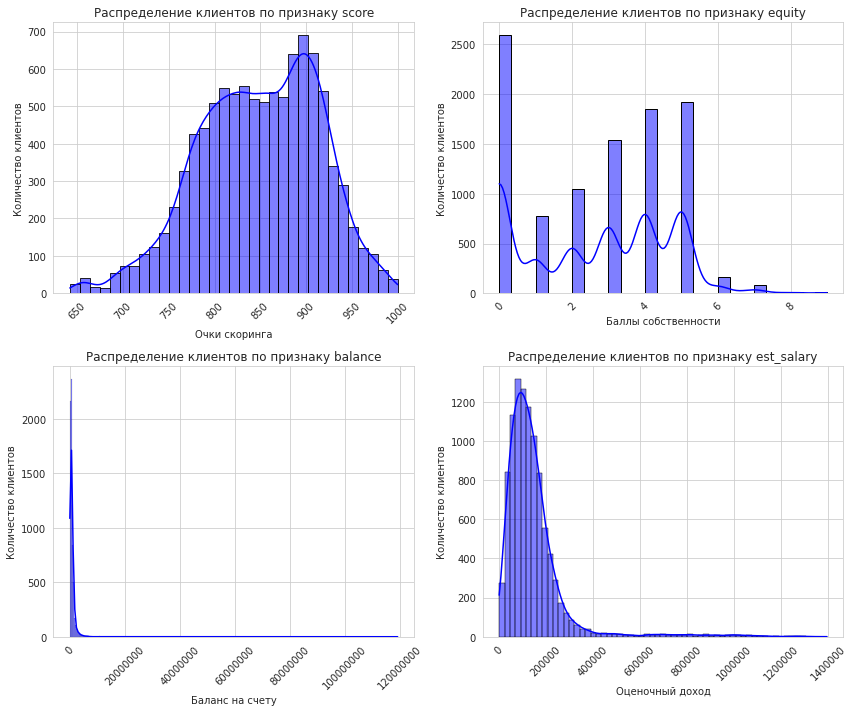

In [41]:
# Функция определения оптимального количества bins по правилу Скотта
def scott_bins(data):
    n = len(data)
    if n == 0:
        return 1
    bin_width = 3.5 * data.std() / (n ** (1/3))
    return int((data.max() - data.min()) / bin_width)

# Выбор столбцов для графиков
columns = ['score', 'equity', 'balance', 'est_salary']
column_mapping = {
    'score': 'Очки скоринга',
    'equity': 'Баллы собственности',
    'balance': 'Баланс на счету',
    'est_salary': 'Оценочный доход'
}

# Создание сетки для графиков 2x2
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Добавление графиков в соответствующие ячейки сетки
for i, column in enumerate(columns):
    bins = scott_bins(df[column])
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=column, bins=bins, kde=True, color='blue', edgecolor='black', ax=axs[row, col])
    axs[row, col].set_title(f"Распределение клиентов по признаку {column}")
    axs[row, col].set_xlabel(column_mapping[column])
    axs[row, col].set_ylabel("Количество клиентов")
    axs[row, col].ticklabel_format(style='plain', axis='x')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Здесь видно, что у большинства клиентов доход до 100 тыс. руб., на счету около 250 тыс. Они имеют 770-920 очков кредитного скоринга и 0 баллов собственности.

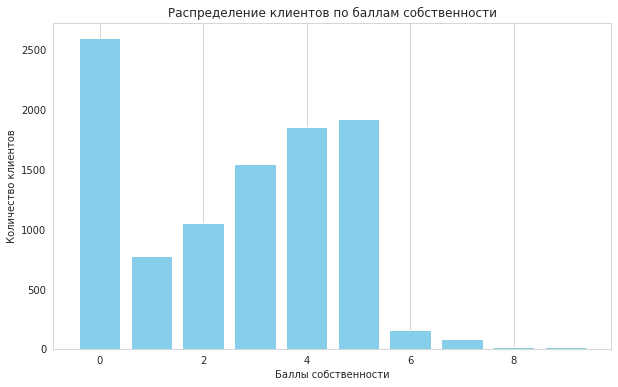

In [42]:
# Подсчитываем количество записей для каждого уникального значения 'equity'
equity_counts = df['equity'].value_counts()

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(equity_counts.index, equity_counts.values, color='skyblue')
plt.xlabel('Баллы собственности')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по баллам собственности')
plt.grid(axis='y', alpha=0.75)
plt.show()

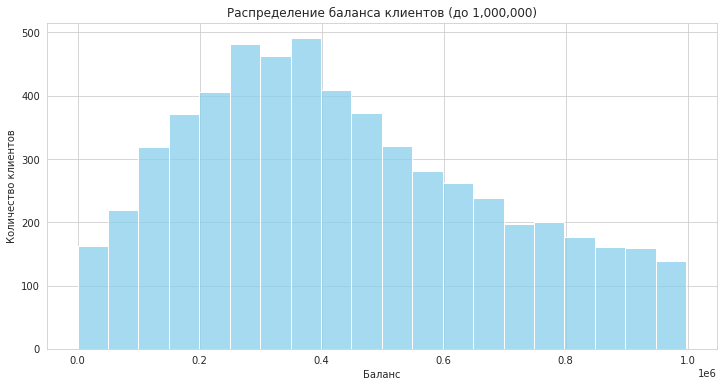

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['balance'] <= 1000000]['balance'], color='skyblue', bins=20)
plt.title('Распределение баланса клиентов (до 1,000,000)')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()

### <a id="5_2"></a>Портрет клиента
[К содержанию](#0)



Теперь создадим портрет клиента.

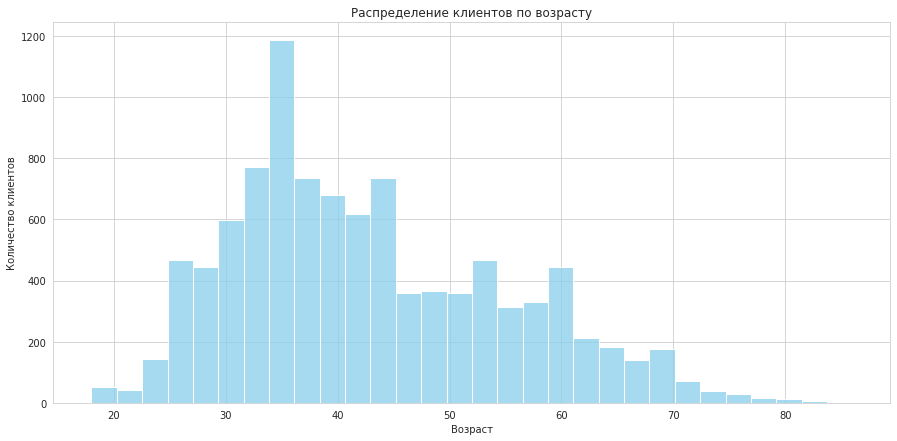

In [45]:
plt.figure(figsize=(15, 7*len(['age'])))
sns.histplot(df['age'], color='skyblue', bins=30)
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

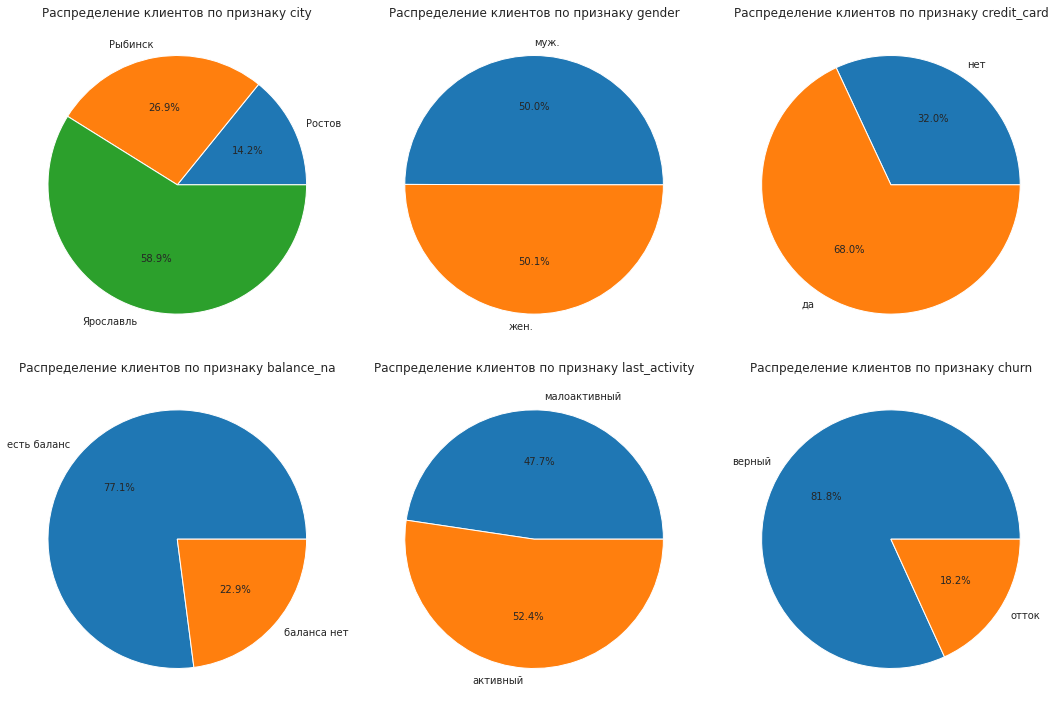

In [46]:
# Построим диаграммы pie распределения клиентов по полу, городу, наличию кредитки, наличию баланса на счёте, активности и подверженности оттоку
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Список столбцов для анализа
columns = ['city', 'gender', 'credit_card', 'balance_na', 'last_activity', 'churn']

# Словарь для замены значений на текстовые метки
labels_dict = {
    'gender': {0: 'муж.', 1: 'жен.'},
    'credit_card': {0: 'нет', 1: 'да'},
    'balance_na': {0: 'есть баланс', 1: 'баланса нет'},
    'last_activity': {0: 'малоактивный', 1: 'активный'},
    'churn': {0: 'верный', 1: 'отток'}
}

# Построение графиков пирога для каждого признака
for idx, column in enumerate(columns):
    data_grouped = df.groupby(column).agg({'userid': 'count'})
    if column in labels_dict:
        data_grouped = data_grouped.rename(index=labels_dict[column])
    ax = axes[idx // 3, idx % 3]
    ax.pie(data_grouped['userid'], labels=data_grouped.index, autopct='%1.1f%%')
    ax.set_title(f'Распределение клиентов по признаку {column}')

plt.tight_layout()
plt.show()

Здесь портрет клиента вырисовывается такой:<br>
- это мужчиина или женщина в равной степени,
- возрастом от 25 до 62 лет,
- живёт и активно обслуживается в банке в Ярославле,
- пользуется кредитной картой,
- имеет счёт с положительным балансом,
- не намерен уходить из банка.

__Промежуточный вывод:__<br>
Вообще из графиков видно, что в Ярославле обслуживаются больше половины клиентов банка, а в Рыбинске 27%, в Ростове по 15%.<br>
По полу клиенты делятся посчти поровну. Возраст клиентов имеет нормальное распределние, пик приходится на 34-36 лет.<br>
Кредитная карта есть почти у 70% клиентов, а счёт у 77%.<br>
Активными банк считает более 52% клиентов, а подверженных оттоку почти 18%.<br>
Большинство клиентов имеют кредитный рейтинг от 880 до 920, но есть с максимальным кредитным рейтингом, хотя пик наблюдается на значении 900.<br>
Положительный баланс на счёте имеет нормальное распределение, пиковые значения приходятся на диапазон 250-400 тыс. руб.<br>
Доход клиентов распределён равномерно на всем диапозоне от 10 тыс. до 300 тыс. руб.<br>
У болшей части клиентов есть от 1 до 5 баллов собственности, но больше тех, у кого нет собственности.<br>
Большинство клиентов пользуются либо одним, либо двумя продуктами банка, однако много клиентов, у которых 5 продуктов. Почти у всех есть кредитка.

### <a id="5_3"></a>Изучение оттока клиентов
[К содержанию](#0)

Проанализируем основные показатели характеристик в контексте ухода клиентов: для категориальных и бинарных характеристик будем использовать средние значения, а для непрерывных характеристик - медианные значения.

Уровень оттока клиентов: 18.20%


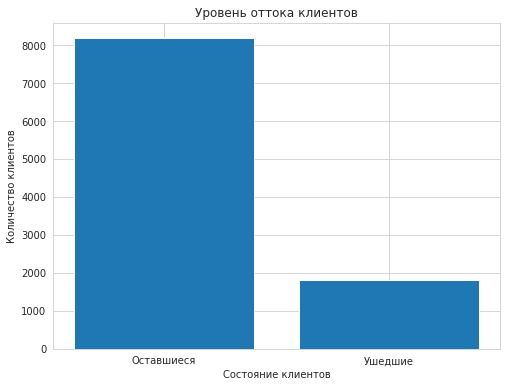

In [47]:
# Рассчитываем уровень оттока
churn_rate = df['churn'].mean() * 100
print(f"Уровень оттока клиентов: {churn_rate:.2f}%")

# Строим столбчатую диаграмму
plt.figure(figsize=(8, 6))
plt.bar(['Оставшиеся', 'Ушедшие'], [len(df[df['churn'] == 0]), len(df[df['churn'] == 1])])
plt.xlabel('Состояние клиентов')
plt.ylabel('Количество клиентов')
plt.title('Уровень оттока клиентов')
plt.show()

In [48]:
# Создадим новые столбцы 'female' и 'male' на основе столбца 'gender'
df['female'] = df['gender'].apply(lambda x: True if x == False else False)
df['male'] = df['gender'].apply(lambda x: True if x == True else False)
df

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_na,city_Ростов,city_Рыбинск,city_Ярославль,female,male
0,183012,850,Рыбинск,False,25,1.0,59214.82,2,False,True,75719.14,True,False,False,True,False,True,False
1,146556,861,Рыбинск,False,37,5.0,850594.33,3,True,False,86621.77,False,False,False,True,False,True,False
2,120722,892,Рыбинск,False,30,0.0,NaN,1,True,True,107683.34,False,True,False,True,False,True,False
3,225363,866,Ярославль,False,51,5.0,1524746.26,2,False,True,174423.53,True,False,False,False,True,True,False
4,157978,730,Ярославль,True,34,5.0,174.00,1,True,False,67353.16,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,True,27,1.0,78144.65,1,False,True,18943.64,False,False,False,True,False,False,True
9996,139170,894,Ярославль,True,46,0.0,NaN,1,True,False,196898.29,False,True,False,False,True,False,True
9997,115639,903,Ярославль,True,24,0.0,NaN,2,True,True,108905.09,False,True,False,False,True,False,True
9998,148700,777,Ярославль,False,68,3.0,865457.97,3,False,True,86874.90,False,False,False,False,True,True,False


Посмотрим статистические показатели для всех столбцоа, сгруппированных по статусу оттока клиентов ('churn').

In [49]:
df_churn = df.groupby('churn').agg({
                         'churn': 'count',
                         'equity': 'mean',
                         'products': 'mean', 
                         'credit_card': 'mean', 
                         'last_activity': 'mean', 
                         'city_Ростов': 'mean', 
                         'city_Рыбинск': 'mean', 
                         'city_Ярославль': 'mean', 
                         'female': 'mean', 
                         'male': 'mean', 
                         'score' : 'median', 
                         'age': 'median', 
                         'balance': 'median', 
                         'balance_na': 'mean', 
                         'est_salary': 'median'}).rename(columns = {'churn':'count'})
display(df_churn)

,count,equity,products,credit_card,last_activity,city_Ростов,city_Рыбинск,city_Ярославль,female,male,score,age,balance,balance_na,est_salary
churn,,,,,,,,,,,,,,,
False,8180,2.374817,1.757579,0.709169,0.483741,0.140709,0.276039,0.583252,0.532763,0.467237,848,40,475382.445,0.278973,118257.715
True,1820,3.763736,2.375824,0.551099,0.702198,0.146154,0.240110,0.613736,0.350000,0.650000,866,39,782410.470,0.007143,125390.620


Что у наас получилось:<br>
1. `count` - 8180 клиентов не подвержены оттоку и 1820 клиентов - это отток.
2. `equity`, `products`, `credit_card`, `last_activity`: здесь средний балл собственности у клиентов с оттоком составляет 3.76, а у клиентов без оттока этот показатель ниже - 2.37, значит, уходящие клиенты имеют в среднем больше собственности; уходящие пользуются в среднем 2,37 продукта; кредитка намного чаще у верных клиентов; а вот активность сильно выше у уходящих клиентов.
3. среди клиентов с оттоком доля клиентов из города Ростова составляет примерно 14.6%, из Рыбинска - 24.0%, из Ярославля - 61.4%, то есть клиенты из Ярославля более склонны к оттоку.
4. из уходящих клиентов 65% - мужчины и 35% - женщчины.
5. `score`, `age`, `balance`, `balance_na`, `est_salary`: из клиентов не имеющих счёт намерены уходить меньше 1%, медианный возраст клиентов с оттоком составляет 39 лет, медианный баланс на счете - 782 410.47 руб., а медианный доход - 125 390.62 руб.

In [50]:
# Группируем даннык по городам и оттоку
df_geo_churn = df.groupby('city').agg({
    'churn': 'mean',  # Доля оттока в каждом городе
    'age': 'mean',    # Средний возраст клиентов в городе
    'balance': 'median'  # Медианный баланс на счете в городе
}).reset_index()  # Сброс индекса для удобства

df_geo_churn.rename(columns={'churn': 'churn_rate', 'age': 'average_age', 'balance': 'median_balance'}, inplace=True)
print(df_geo_churn)

        city  churn_rate  average_age  median_balance
0     Ростов    0.187721    44.138320      485433.060
1    Рыбинск    0.162152    43.310946      503312.275
2  Ярославль    0.189708    42.120584      544525.020


Получили долю оттока клиентов в каждом из городов. Например, в Ростове доля оттока составляет примерно 18%, в Рыбинске - около 16%, а в Ярославле - около 19%.<br>
Ещё получили средний возраст подверженных оттоку клиентов в каждом из городов. Например, в Ростове это приблизительно 44 года, в Рыбинске - около 43 лет, а в Ярославле - около 42 лет.<br>
Также нашли медиану баланса на счёте уходящих клиентов в каждом из городов. Например, в Ростове медианный баланс составляет примерно 485 433 руб., в Рыбинске - около 503 312 руб., а в Ярославле - около 544 525 руб.

In [51]:
# Сравним все характеристики клиентов, подверженных оттоку и нет
pd.concat({
    'Верные': df_churn.iloc[0],
    'Уходящие': df_churn.iloc[1],
    'Разница %': (df_churn.iloc[1] / df_churn.iloc[0] - 1) * 100},
    axis=1).sort_values('Разница %')

,Верные,Уходящие,Разница %
balance_na,0.278973,0.007143,-97.439589
count,8180.000000,1820.000000,-77.750611
female,0.532763,0.350000,-34.304727
credit_card,0.709169,0.551099,-22.289450
city_Рыбинск,0.276039,0.240110,-13.015992
age,40.000000,39.000000,-2.500000
score,848.000000,866.000000,2.122642
city_Ростов,0.140709,0.146154,3.869545
city_Ярославль,0.583252,0.613736,5.226633
est_salary,118257.715000,125390.620000,6.031661


Здесь видны достаточного размера группы для использования статистических методов их сравнения.<br>
Средние уходящих клиентов и верных сильно отличаются (более 10%) в следующих характеристиках:<br>
- balance (наличие счёта),
- equity (баллы собственности),
- last_activity (активность),
- male (мужской пол),
- products (пользование банковскими продуктами),
- credit_card (наличие кредитной карты).


Характеристики в которых разница в оттоке слабо выражена такие:<br />
- est_salary (оценочный доход),
- города Ярославль и Ростов,
- score (кредитный рейтиинг),
- age (возраст).


Посмотрим на детальных графиках количественные непрерывные характеристики плотности распределения по оттоку.

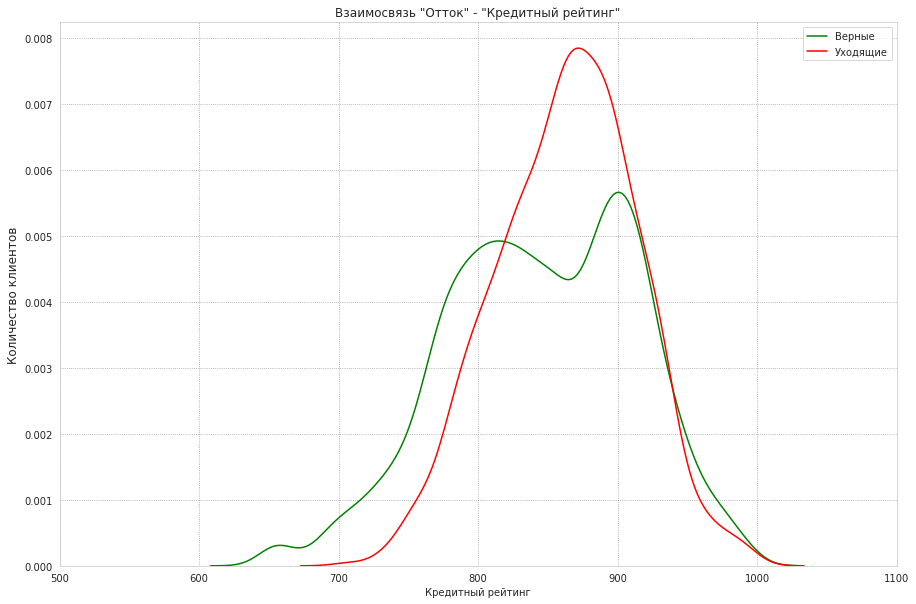

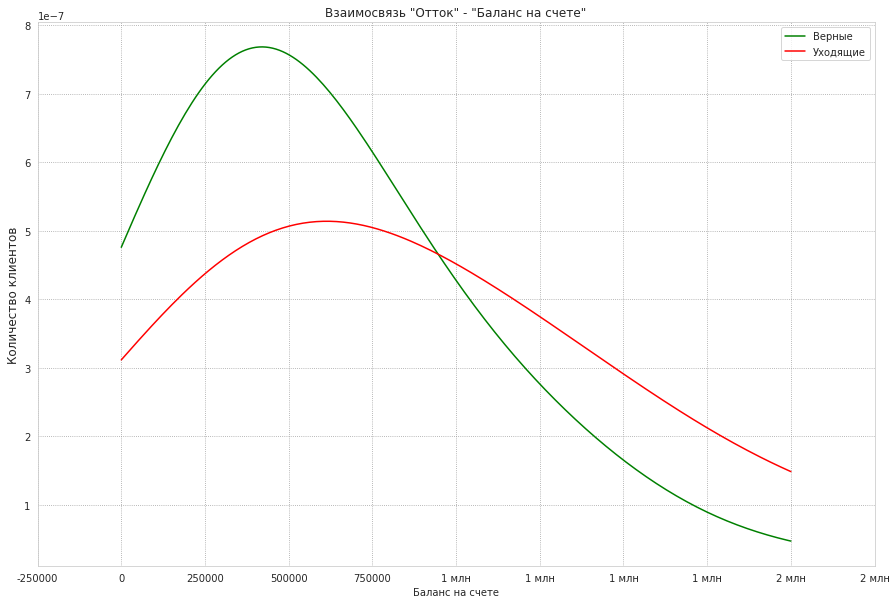

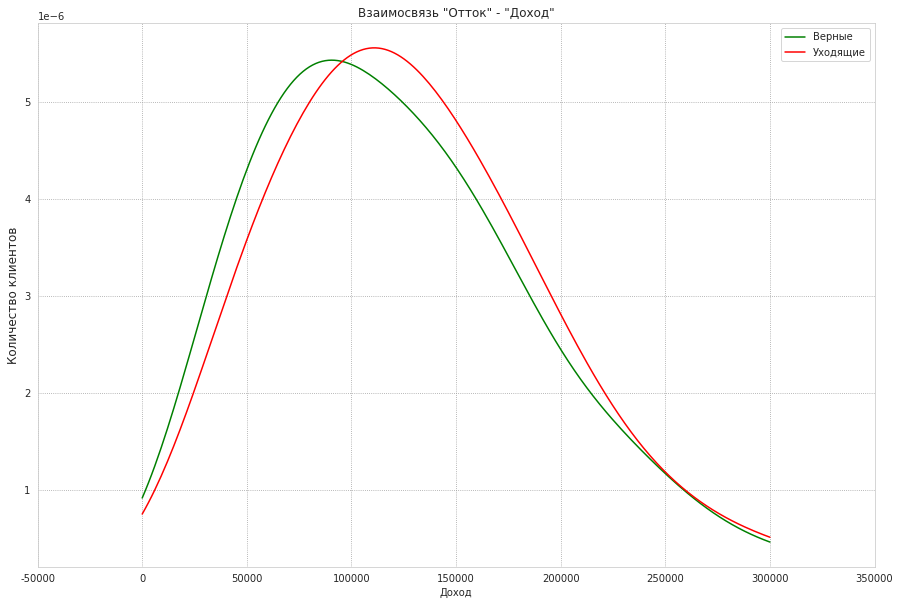

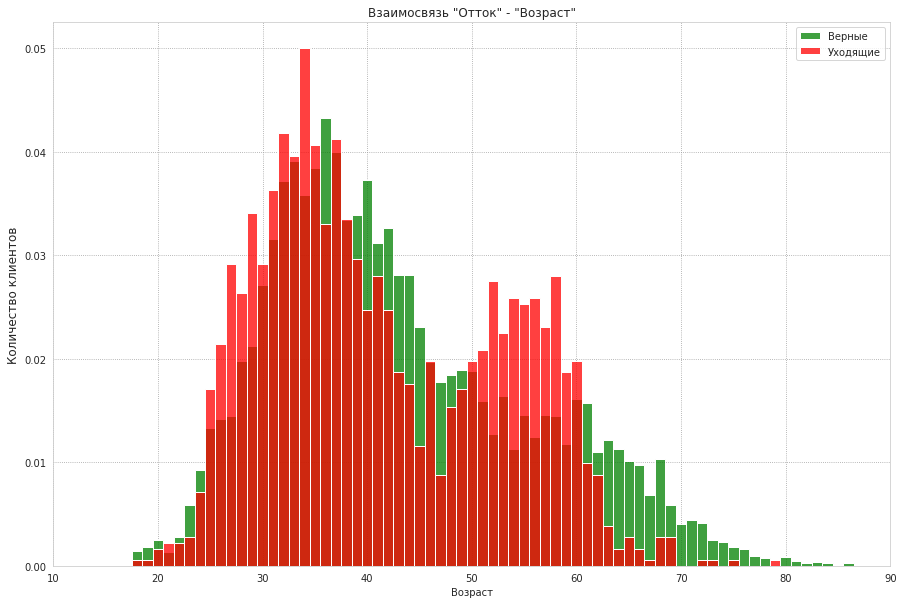

In [52]:
# Построим графики для связи 'score', 'balance', 'est_salary', 'age' с 'churn'
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Новые названия столбцов
columns_mapping = {
    'score': 'Кредитный рейтинг',
    'balance': 'Баланс на счете',
    'est_salary': 'Доход',
    'age': 'Возраст'
}

# Задание переменных для пары переменных и их цветов
variables = ['score', 'balance', 'est_salary', 'age']
colors = ['green', 'red']

for var in variables:
    plt.figure(figsize=(15, 10))
    for i, churn_status in enumerate(['Верные', 'Уходящие']):
        churn_data = df[df['churn'] == i]
        if var == 'age':
            sns.histplot(churn_data[var], discrete=True, stat='density', common_norm=False, color=colors[i])
        else:
            sns.kdeplot(churn_data[var], clip=(0.0, 2000000.0) if var != 'est_salary' else (0.0, 300000.0), common_norm=False, color=colors[i])
    
    plt.legend(['Верные', 'Уходящие'])
    plt.title(f'Взаимосвязь "Отток" - "{columns_mapping[var]}"')
    plt.xlabel(columns_mapping[var])
    plt.ylabel('Количество клиентов', fontsize=12)  # Добавляем подпись оси Y
    plt.xticks(ticks=plt.xticks()[0], labels=[int(x) if x < 1e6 else f'{int(x/1e6)} млн' for x in plt.xticks()[0]])
    plt.show()

Проверим результаты другими методами.

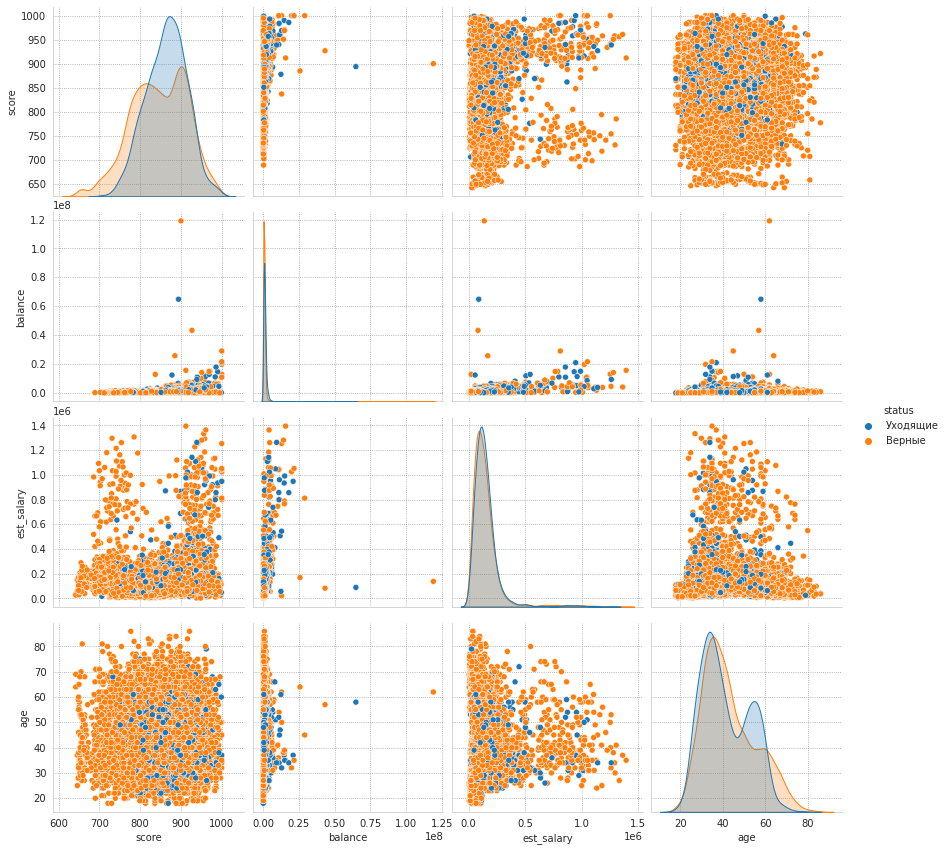

In [53]:
# Создалим новый столбец 'status' на основе значения 'churn'
df['status'] = df['churn'].apply(lambda x: 'Уходящие' if x == True else 'Верные')

# Строим pairplot с новым столбцом
sns.pairplot(df[['score', 'balance', 'est_salary', 'age', 'status']], hue='status', height=3, diag_kws={"common_norm": False});

Полученные результаты подтверждаются, и более.<br>
Так как распределение по возрасту и оттоку перекрываются на разных интервалах, то разделим уходящих клиентов по возрастным группам: 18-24, 25-35, 36-50, 51-60, старше 60.

In [54]:
# Определение диапазонов возрастных групп
bins = [18, 25, 36, 51, 61, df['age'].max()+1]
labels = ['18-24', '25-35', '36-50', '51-60', 'старше 60']

# Создание столбца 'age_cat' с возрастными группами
df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False, include_lowest=True)

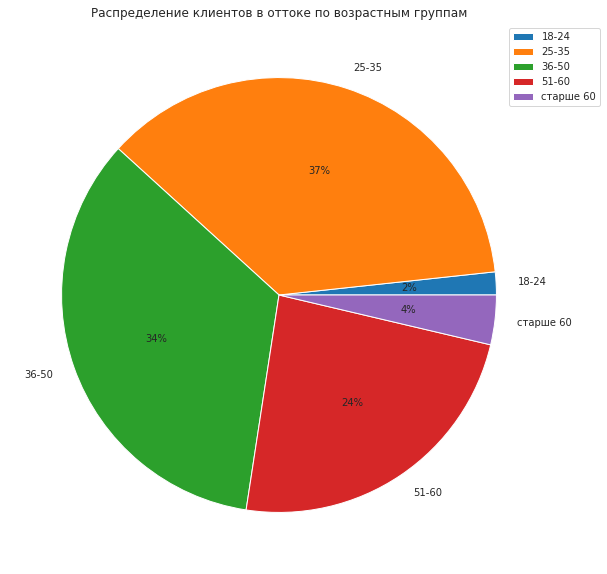

In [55]:
# Построим пирог распределения возрастных групп
pie_data = df.groupby('age_cat')['churn'].sum()
pie_data.plot.pie(figsize=(15, 10), autopct='%1.0f%%', title='Распределение клиентов в оттоке по возрастным группам', legend=True)
plt.legend(pie_data.index, loc='upper right', bbox_to_anchor=(1.1, 1))
plt.ylabel('')
plt.show()

Для категориальных характеристик - 'city', 'equity', 'products' - построим диаграммы уровня оттока клиентов.

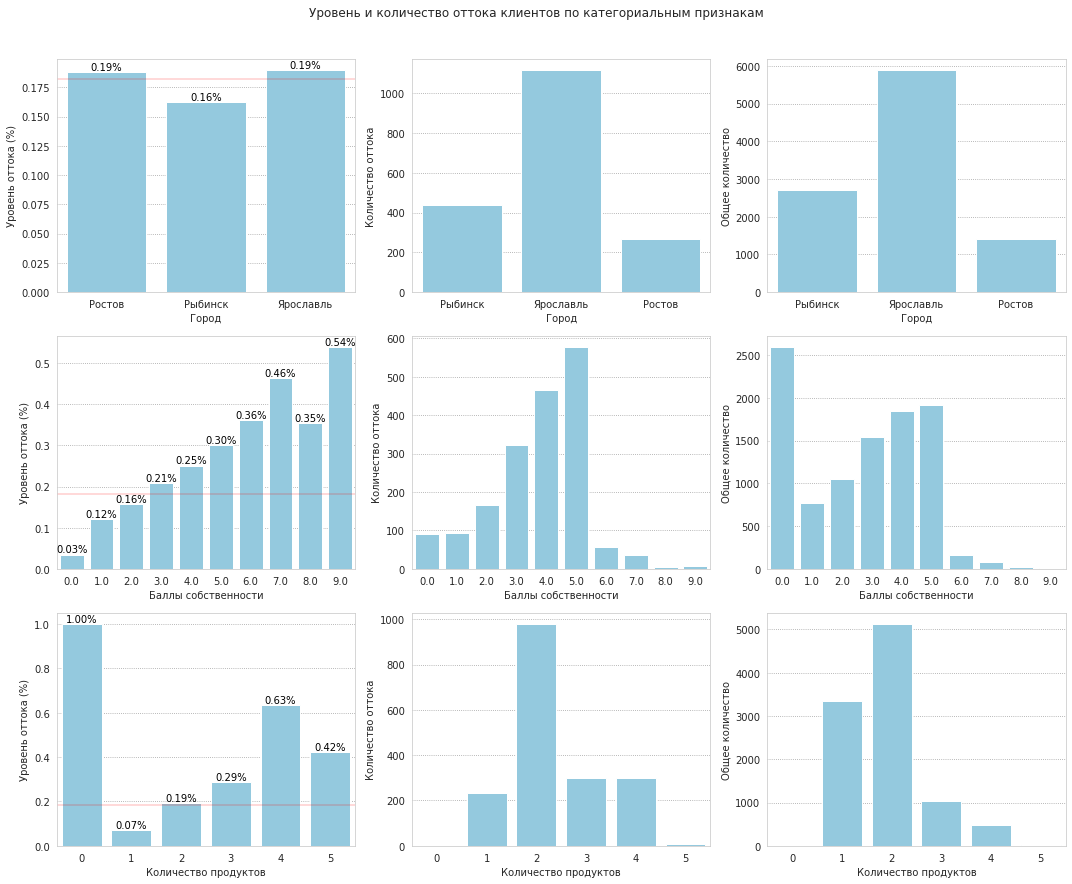

In [57]:
# Функция установки подписей оси X
def set_xlabels(ax, label):
    ax.set_xlabel(label)

# Словарь для подписей категориальных признаков
xlabels_dict = {'city': 'Город', 'equity': 'Баллы собственности', 'products': 'Количество продуктов'}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for n, categorical in enumerate(['city', 'equity', 'products']):
    churn_data = df[df['churn'] == 1]
    
    # Количество оттока клиентов в категории
    sns.countplot(data=churn_data, x=categorical, ax=axes[n][1], color='skyblue')
    axes[n][1].set_ylabel("Количество оттока")
    set_xlabels(axes[n][1], xlabels_dict[categorical])
    
    # Количество всех клиентов в категории
    sns.countplot(data=df, x=categorical, ax=axes[n][2], color='skyblue')
    axes[n][2].set_ylabel("Общее количество")
    set_xlabels(axes[n][2], xlabels_dict[categorical])
    
    # Уровень оттока в категории
    churn_levels = df.groupby(categorical)['churn'].mean().reset_index()
    churn_mean = df['churn'].mean()

    sns.barplot(data=churn_levels, x=categorical, y='churn', ax=axes[n][0], color='skyblue')
    axes[n][0].axhline(y=churn_mean, color='red', alpha=0.2)
    axes[n][0].set_ylabel("Уровень оттока (%)")
    set_xlabels(axes[n][0], xlabels_dict[categorical])

    # Добавление меток
    for bar in axes[n][0].patches:
        axes[n][0].annotate(format(bar.get_height(), '.2f') + '%', 
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                            ha='center', va='bottom', color='black', size=10)
    
fig.suptitle("Уровень и количество оттока клиентов по категориальным признакам", y=1.02)
plt.tight_layout()
plt.show()

Теперь построим диаграммы по географическому признаку, по полу, наличию кредитки и активности.

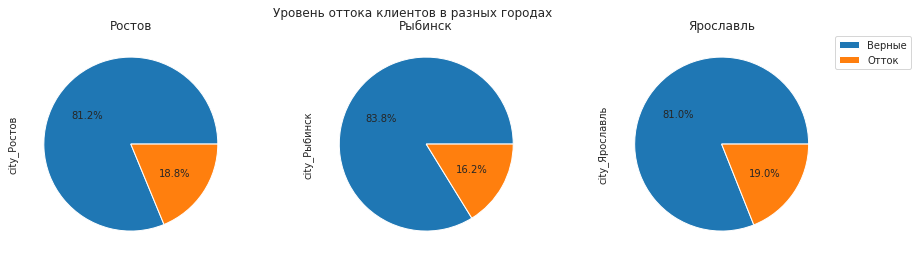

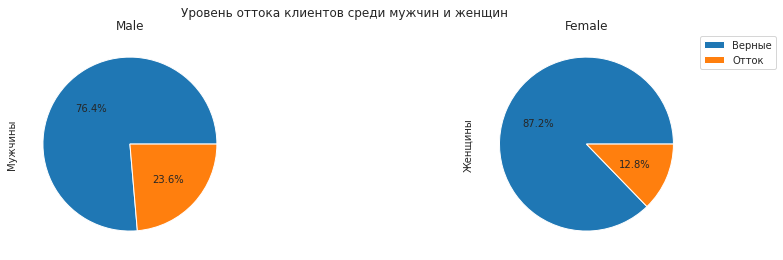

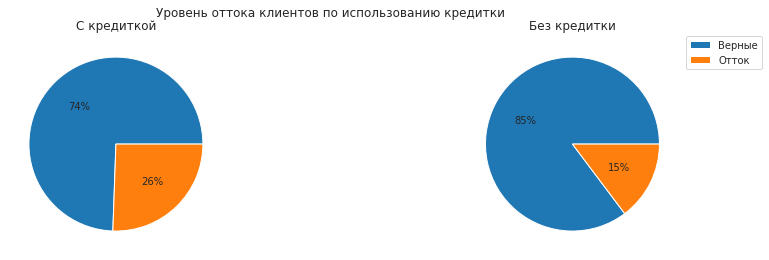

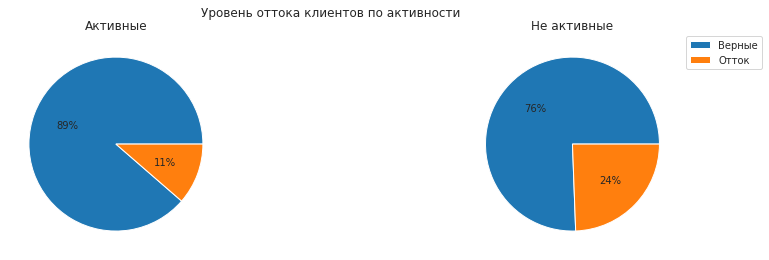

In [58]:
# Строим графики уровня оттока клиентов в разных городах
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Уровень оттока клиентов в разных городах")

cities = ['city_Ростов', 'city_Рыбинск', 'city_Ярославль']
city_names = ['Ростов', 'Рыбинск', 'Ярославль']

for i, city in enumerate(cities):
    churn_data = df.groupby('churn')[city].sum()
    churn_data.plot(ax=axes[i], kind='pie', y=city, autopct='%0.1f%%', legend=False, labeldistance=None)
    axes[i].set_title(city_names[i])

axes[2].legend(['Верные', 'Отток'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# Графики уровня оттока среди мужчин и женщин
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle("Уровень оттока клиентов среди мужчин и женщин")

for i, gender in enumerate(['male', 'female']):
    churn_data = df.groupby('churn')[gender].sum()
    churn_data.plot(ax=axes[i], kind='pie', y=gender, autopct='%0.1f%%', legend=False, labeldistance=None)
    axes[i].set_title(gender.capitalize())

axes[1].legend(['Верные', 'Отток'], bbox_to_anchor=(1, 1.02), loc='upper left')
axes[0].set(ylabel='Мужчины')
axes[1].set(ylabel='Женщины')
plt.show()

# Графики уровня оттока по использованию кредитной карты
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle("Уровень оттока клиентов по использованию кредитки")

churn_level = df.groupby('credit_card')['churn'].mean()
for i, card_status in enumerate(['С кредиткой', 'Без кредитки']):
    values = [1 - churn_level.loc[i], churn_level.loc[i]]
    axes[i].pie(x=values, autopct='%.0f%%')
    axes[i].set_title(card_status)

axes[1].legend(['Верные', 'Отток'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

# График уровня оттока по активности клиентов
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle("Уровень оттока клиентов по активности")

churn_level = df.groupby('last_activity')['churn'].mean()
for i, activity_status in enumerate(['Активные', 'Не активные']):
    values = [1 - churn_level.loc[i], churn_level.loc[i]]
    axes[i].pie(x=values, autopct='%.0f%%')
    axes[i].set_title(activity_status)

axes[1].legend(['Верные', 'Отток'], bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

Если смотреть проценты, то больше всего отток в Ростове. Чаще уходят мужчины, почти в 2 раза чаще. И с кредитной картой (тоже почти в 2 раза больше, чем без неё). И уходили, в основном, малоактивные клиенты - 23% против 11%.

__Промежуточный вывод:__<br>
Графики показывают, что наиболее оттоку подвержены клиенты, у которых:
- баллы кредитного рейтинга от 850 до 900,
- баланс на счёте от 500-750 тыс. руб.,
- оценочный доход клиента от 85 до 110 тыс. руб.,
- возраст от 25 до 35, либо от 50 до 60 лет,
- от 3 до 5 баллов собственности,
- количество продуктов 2-4,
- пол мужчина,
- есть кредитная карта,
- неактивные.


Разница уровня оттока по городам почти незаметна, поэтоиму её нужно проверять с помощью метода гипотиз.

In [59]:
# Создаем диапазоны близких значений для столбца balance
bins = [0, 5000, 50000, 100000, 300000, 500000, 1000000, max(df['balance'])]
labels = ['<5000', '5000 - 50 тыс.', '50 тыс. - 100 тыс.', '100 тыс. - 300 тыс.', '300 тыс. - 500 тыс.', '500 тыс. - 1 млн', 'больше 1 млн']

# Добавляем новый столбец с категориями по балансу
df['balance_range'] = pd.cut(df['balance'], bins=bins, labels=labels, include_lowest=True)

# Группируем данные по диапазонам близких значений и считаем количество клиентов в каждом диапазоне
total_clients_by_balance_range = df.groupby('balance_range').size()

# Группируем данные по диапазонам близких значений и считаем количество клиентов подверженных оттоку
churn_by_balance_range = df[df['churn'] == 1].groupby('balance_range').size()

total_churned_count = df['churn'].sum()

for balance_range, churn_count in churn_by_balance_range.items():
    total_clients = total_clients_by_balance_range[balance_range]
    churn_rate_in_range = churn_count / total_clients
    churn_rate_total1 = churn_count / total_churned_count
    churn_rate_total = churn_count / len(df)
    print(f"\n\nДиапазон баланса: {balance_range}, Общее число клиентов: {total_clients}, "
          f"\nЧисло клиентов подверженных оттоку: {churn_count}, "
          f"\nДоля клиентов подверженных оттоку от общего числа в диапазоне: {churn_rate_in_range:.2%}, "
          f"\nДоля клиентов подверженных оттоку от общего числа отточных: {churn_rate_total1:.2%}, "
          f"\nДоля клиентов подверженных оттоку от общего количества клиентов банка: {churn_rate_total:.2%}")

# В столбце 'balance' много пропусков
missing_values_count = df['balance'].isnull().sum()
if missing_values_count > 0:
    print(f"\nОбнаружено {missing_values_count} клиентов, у которых нет баланса на счёте.")

    # Подсчет количества пропущенных значений, где отток равен 1
    missing_churned_count = df[df['balance'].isnull() & (df['churn'] == 1)].shape[0]
    
    print(f"Подвержены оттоку без баланса {missing_churned_count} клиентов.")



Диапазон баланса: <5000, Общее число клиентов: 37, 
Число клиентов подверженных оттоку: 4, 
Доля клиентов подверженных оттоку от общего числа в диапазоне: 10.81%, 
Доля клиентов подверженных оттоку от общего числа отточных: 0.22%, 
Доля клиентов подверженных оттоку от общего количества клиентов банка: 0.04%


Диапазон баланса: 5000 - 50 тыс., Общее число клиентов: 127, 
Число клиентов подверженных оттоку: 27, 
Доля клиентов подверженных оттоку от общего числа в диапазоне: 21.26%, 
Доля клиентов подверженных оттоку от общего числа отточных: 1.48%, 
Доля клиентов подверженных оттоку от общего количества клиентов банка: 0.27%


Диапазон баланса: 50 тыс. - 100 тыс., Общее число клиентов: 221, 
Число клиентов подверженных оттоку: 27, 
Доля клиентов подверженных оттоку от общего числа в диапазоне: 12.22%, 
Доля клиентов подверженных оттоку от общего числа отточных: 1.48%, 
Доля клиентов подверженных оттоку от общего количества клиентов банка: 0.27%


Диапазон баланса: 100 тыс. - 300 тыс., 

### <a id="6_6"></a>Корреляция признаков оттока между собой
[К содержанию](#0)<br>

Помтроим матрицу корреляций данных между собой по признаку оттока.

In [60]:
# Удаление лишних столбцов
df_c = df.drop(columns=['city', 'age_cat', 'gender']).copy()
df_c

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_na,city_Ростов,city_Рыбинск,city_Ярославль,female,male,status,balance_range
0,183012,850,25,1.0,59214.82,2,False,True,75719.14,True,False,False,True,False,True,False,Уходящие,50 тыс. - 100 тыс.
1,146556,861,37,5.0,850594.33,3,True,False,86621.77,False,False,False,True,False,True,False,Верные,500 тыс. - 1 млн
2,120722,892,30,0.0,NaN,1,True,True,107683.34,False,True,False,True,False,True,False,Верные,NaN
3,225363,866,51,5.0,1524746.26,2,False,True,174423.53,True,False,False,False,True,True,False,Уходящие,больше 1 млн
4,157978,730,34,5.0,174.00,1,True,False,67353.16,True,False,False,False,True,False,True,Уходящие,<5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,27,1.0,78144.65,1,False,True,18943.64,False,False,False,True,False,False,True,Верные,50 тыс. - 100 тыс.
9996,139170,894,46,0.0,NaN,1,True,False,196898.29,False,True,False,False,True,False,True,Верные,NaN
9997,115639,903,24,0.0,NaN,2,True,True,108905.09,False,True,False,False,True,False,True,Верные,NaN
9998,148700,777,68,3.0,865457.97,3,False,True,86874.90,False,False,False,False,True,True,False,Верные,500 тыс. - 1 млн


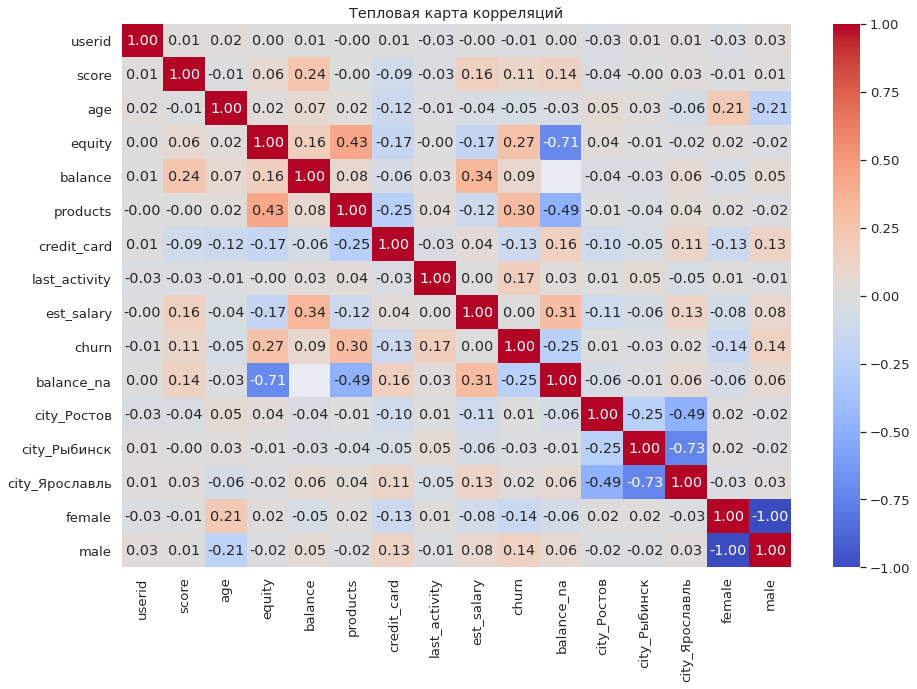

In [61]:
# Создаем матрицу корреляций
correlation_matrix = df_c.corr()

# Размер и стиль тепловой карты
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)

# Построение тепловой карты на основе матрицы корреляций
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Тепловая карта корреляций')
plt.show()

Сильной зависимости оттока от других признаков не видно. Больше всего отток коррелирует с баллами собственности и количеством продуктов, но зависимость всего 25% и 27%. Ещё видна слабая обратная корреляция с отсутствием баланса на счёте, то есть оттоку меньше подвержены клиенты у которых есть средства на счету. Но эта зависимость опять же слабая, всего 23%. То есть нельзя утверждать, что эти признаки влияют на отток.

### <a id="6_5"></a>Промежуточный вывод
[К содержанию](#0)<br>


В результате исследовательского анализа был составлен портрет типичного клиента банка:
- половина клиентов обслуживается в Ярославле
- 70% клиентов пользуются кредитной картой банка
- отток клиентов составил 20%
- активных клиентов 50%
- средний возраст клиентов 35-38 лет
- средний баланс на карте составляет 12-130 т.р.
- большинство клиентов пользуются 1-2 продуктами
- средний доход около 100 т.р.
- клинты с 3 продуктами чаще уходят
- клиенты с 4 продуктами уходят в 100% случаев
- клиенты с кредитным рейтингом ниже 400 уходят из банка
- самый большой отток в Ростове.

Также было выяснено, что подвержены оттоку клиенты, у которых:
- баллы кредитного рейтинга от 850 до 900,
- баланс на счёте более 1 млн руб.,
- оценочный доход клиента от 85 до 110 тыс. руб.,
- возраст от 25 до 35, либо от 50 до 60 лет,
- от 3 до 5 баллов собственности,
- количество продуктов 2-4,
- пол мужчина,
- есть кредитная карта,
- неактивные.

### <a id="5_4"></a> Проверка статистических гипотез:
[К содержанию](#0)<br>
Что делаем:
- Поверяем корректность стат. тестов и обоснуем выбор.
- Формулируем гипотезы.
- Проверка и интерпретация результатов.

#### Выбер теста

Для использования t-теста нужно проверить:
- как зависят друг от друга генеральные совокупности;
- нормально ли распределены выборочные средние;
- дисперсии рассматриваемых генеральных совокупностей равны.

Мы будем проверять гипотезы по доходам, балансу, городам, возрасту, наличию кредитки, используемым продуктам.

In [64]:
# Функция для проверки нормальности распределения средних выборочных на совместной выборке методом бутстрепа
def bootstrap_normality_test(data, num_samples=1000):
    """
    Проверяет нормальность распределения средних выборочных на совместной выборке методом бутстрепа.
    Аргументы:
    data - исходный массив данных.
    num_samples - число повторных выборок для бутстрепа.
    Возвращает:
    p_value - P-значение теста Шапиро-Уилка для средних выборочных.
    """
    mean_values = []
    n = len(data)
    
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        sample_mean = np.mean(sample)
        mean_values.append(sample_mean)

    _, p_value = stats.shapiro(mean_values)
    
    return p_value

# Список переменных для анализа
variables = ['est_salary', 'age', 'products', 'score', 'equity']

# Проверка нормальности распределения средних выборочных на совместной выборке для каждой переменной
for var in variables:
    data_var = df[var]  # Исходные данные для переменной
    
    # Проверка нормальности распределения средних выборочных на совместной выборке
    p_value = bootstrap_normality_test(data_var, num_samples=1000)
    
    # Вывод результатов теста
    if p_value < 0.05:
        print(f"\nРаспределение средних выборочных для переменной {var} не является нормальным: P-значение теста: {p_value:.4f}")
    else:
        print(f"\nРаспределение средних выборочных для переменной {var} является нормальным.")


Распределение средних выборочных для переменной est_salary является нормальным.

Распределение средних выборочных для переменной age является нормальным.

Распределение средних выборочных для переменной products является нормальным.

Распределение средних выборочных для переменной score является нормальным.

Распределение средних выборочных для переменной equity является нормальным.


In [65]:
# Функция для проверки равенства дисперсий двух генеральных совокупностей
def equal_variances_test(data1, data2):
    """
    Проверяет равенство дисперсий двух генеральных совокупностей.
    Аргументы:
    data1 - данные первой генеральной совокупности.
    data2 - данные второй генеральной совокупности.
    Возвращает:
    p_value - P-значение теста на равенство дисперсий.
    """
    _, p_value = f_oneway(data1, data2)
    
    return p_value

# Список переменных для анализа
variables = ['est_salary', 'age', 'products', 'score', 'equity']

# Проверка равенства дисперсий для каждой переменной
for var in variables:
    data_true = df[df['churn'] == True][var]
    data_false = df[df['churn'] == False][var]
    
    p_value = equal_variances_test(data_true, data_false)
    
    print(f"Переменная: {var}")
    print(f"P-значение теста на равенство дисперсий: {p_value:.4f}")
    if p_value < 0.05:
        print("Дисперсии различны.")
    else:
        print("Дисперсии одинаковы.")
    print()

Переменная: est_salary
P-значение теста на равенство дисперсий: 0.8987
Дисперсии одинаковы.

Переменная: age
P-значение теста на равенство дисперсий: 0.0000
Дисперсии различны.

Переменная: products
P-значение теста на равенство дисперсий: 0.0000
Дисперсии различны.

Переменная: score
P-значение теста на равенство дисперсий: 0.0000
Дисперсии различны.

Переменная: equity
P-значение теста на равенство дисперсий: 0.0000
Дисперсии различны.



__Результат по количественным параметрам:__
1. Генеральные совокупности не зависят друг от друга.
2. Распределение значений не нормальное.
3. Дисперсии не равны.<br>

__*Значит, эти выборки не подходят для проведения t-testa.*__<br>
В таких условиях, как отсутствие нормального распределения сравниваемых выборок, альтернативными методами статистического анализа, которые могут использоваться вместо t-теста Стьюдента, будут методы непараметрической статистики. Лучше U-тест Манна — Уитни, который позволяет сравнивать две независимые выборки, не требуя предварительного предположения о нормальности распределения данных.

Теперь проверим связь категориальных признаков с оттоком методом Хи-квадрата.

In [66]:
binary_columns = ["gender", "credit_card", "last_activity"]

for column in binary_columns:
    contingency_table = pd.crosstab(df['churn'], df[column])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    
    print(f"Результаты теста Хи-квадрат для столбца '{column}':")
    print("p-значение:", p_val)
    if p_val < 0.05:
        print(f"Существует статистически значимая связь между оттоком и '{column}'")
    else:
        print(f"Нет статистически значимой связи между оттоком и '{column}'")

Результаты теста Хи-квадрат для столбца 'gender':
p-значение: 5.207879540687806e-45
Существует статистически значимая связь между оттоком и 'gender'
Результаты теста Хи-квадрат для столбца 'credit_card':
p-значение: 6.251601582963701e-39
Существует статистически значимая связь между оттоком и 'credit_card'
Результаты теста Хи-квадрат для столбца 'last_activity':
p-значение: 1.0352217586739765e-63
Существует статистически значимая связь между оттоком и 'last_activity'


Видимо придётся проверять и эти гипотезы. Сейчас проверим связь оттока с городами.

In [67]:
# Создаём новый cтолбец city
city_true = df[df['churn'] == True]['city']
city_false = df[df['churn'] == False]['city']

# Применим тест Хи-квадрат для проверки распределения категориального параметра
chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(df['churn'], df['city']))

print("p-значение для теста Хи-квадрат:", p_val)
if p_val < 0.05:
    print("Существует значимая связь между оттоком и городом")
else:
    print("Нет значимой связи между оттоком и городом")

p-значение для теста Хи-квадрат: 0.007475080891989864
Существует значимая связь между оттоком и городом


И гипотезы с городами тожде проверим.

#### Функция проверки гипотез

In [69]:
def hypothesis_test(feature, data):
    """
    Функция hypothesis_test проводит статистические тесты в зависимости от типа признака.
    Параметры:
    - feature: имя признака для проведения теста
    - data: DataFrame с данными
    Возвращает:
    - stat: статистика теста
    - p_value: p-значение
    - conclusion: вывод о результате теста
    """
    
    churn_true = data[data['churn'] == True][feature]
    churn_false = data[data['churn'] == False][feature]
    
    stat = None  # Инициализируем переменную для статистики
    p_value = None  # Инициализируем переменную для p-значения
    
    # Проверяем тип признака и выбираем соответствующий статистический тест
    if feature in ['score', 'age', 'balance', 'est_salary']:
        # Манна-Уитни для непрерывных величин
        stat, p_value = mannwhitneyu(churn_true, churn_false)
    elif feature in ['products', 'equity']:
        # Хи-квадрат для дискретных переменных
        observed = pd.crosstab(data['churn'], data[feature])
        stat, p_value, _, _ = chi2_contingency(observed)
    elif feature in ['gender', 'credit_card', 'last_activity', 'churn']:
        # z-тест для бинарных переменных
        stat, p_value = proportions_ztest([churn_true.sum(), churn_false.sum()], [len(churn_true), len(churn_false)])

    # Вывод результата теста
    conclusion = "отвергается" if p_value and p_value < 0.05 else "подтверждается"
    
    return stat, p_value, conclusion

#### Гипотеза №1 - Кредитный рейтинг

Мы проверим гипотезу, что у клиентов, подверженных оттоку, и остающихся кредитные рейтинги равны.

H_0: значения score у клиентов с оттоком=1 равны значениям у клиентов с оттоком=0;<br>
H_1: значения score у клиентов с оттоком=1 не равны значениям у клиентов с оттоком=0.

In [70]:
# Использование функции для признака 'score'
stat, p_value, conclusion = hypothesis_test('score', df)
print(f"Для признака кредитный рейтиинг: \nСтатистика = {stat}, p-значение = {p_value}. \nНулевая гипотеза {conclusion}.")
print()

Для признака кредитный рейтиинг: 
Статистика = 8517589.5, p-значение = 5.414915248731254e-22. 
Нулевая гипотеза отвергается.



#### Гипотеза № 2 - Отток зависит от дохода

Проверим гипотезу о различии дохода между клиентами, которые подвержены оттоку и нет.

Н_0: средний доход клиентов с оттоком=1 равен среднему доходу клиентов с оттоком=0;<br>
Н_1: средний доход клиентов с оттоком=1 не равен среднему доходу клиентов с оттоком=0.

In [72]:
# Использование функции для признака 'est_salary'
stat, p_value, conclusion = hypothesis_test('est_salary', df)
print(f"Для признака доход: \nСтатистика = {stat}, p-значение = {p_value}. \nНулевая гипотеза {conclusion}.")
print()

Для признака доход: 
Статистика = 7852481.0, p-значение = 0.000243559272811695. 
Нулевая гипотеза отвергается.



#### Гипотеза № 3 - Отток зависит от города

Здесь проверим гипотезу, что отток клиентов зависит от города их обслуживания. Однако выборки являются набором бинарных значений, поэтому t-test для нормально распределённых данных применять нельзя, а сравнение средних не даст корректного результата. Используем z-test для проверки гипотезы и метод Фишера, потому что размер выборки небольшой, у нас независимые категориальные параметры и неравномерные данные.<br>
H_0: отток зависит от города обслуживания клиента;<br>
H_1: отток не зависит от города.

In [76]:
churn_val = df['churn'].mean()
cities = ['Ростов', 'Рыбинск', 'Ярославль']

for city in cities:
    f_city = df["city"] == city
    successes = df[f_city]['churn'].sum()
    nobs = df[f_city]['churn'].count()
    count = np.array([successes, nobs - successes])
    nobs_arr = np.array([nobs, nobs])
    
    _, p_value = sm.stats.proportions_ztest(count=df.loc[f_city, "churn"].sum(),
                          nobs=df.loc[f_city, "churn"].count(),
                          value=df['churn'].mean())
    
    print(f"{city}:")
    if p_value < 0.05:
        print(f"  p-значение z-test: {'{0:0.5f}'.format(p_value)}")
        print(f"  Отвергаем нулевую гипотезу для города {city}")
    else:
        print(f"  p-значение z-test: {'{0:0.5f}'.format(p_value)}")
        print(f"  Не получилось отвергнуть нулевую гипотезу для города {city}")
    print()

Ростов:
  p-значение z-test: 0.58132
  Не получилось отвергнуть нулевую гипотезу для города Ростов

Рыбинск:
  p-значение z-test: 0.00518
  Отвергаем нулевую гипотезу для города Рыбинск

Ярославль:
  p-значение z-test: 0.13142
  Не получилось отвергнуть нулевую гипотезу для города Ярославль



#### Гипотеза № 4 - отток зависит от возраста клиентов

Теперь протестируем гипотезу, что отток клиентов зависит от их среднего возраста.

Н-0: средний возраст клиентов, подверженных оттоку, равен среднему возрасту остющихся клиентов;<br>
Н-1: средний возраст клиентов, подверженных оттоку, не равен среднему возрасту остющихся клиентов.

In [78]:
# Использование функции для признака 'age'
stat, p_value, conclusion = hypothesis_test('age', df)
print(f"Для признака возраст: \nСтатистика = {stat}, p-значение = {p_value}. \nНулевая гипотеза {conclusion}.")
print()

Для признака возраст: 
Статистика = 6933467.0, p-значение = 4.577903787731364e-06. 
Нулевая гипотеза отвергается.



#### Выводы сравнения гипотез

1. Кредитный рейтинг уходящих клиентов отличается от рейтинга верных.
2. Средние доходы отточных и неотточных клиентов разные.
3. Отток зависит от города клиента: в Ростое и Ярославле, а в Рыбинске - нет.
4. Средний возраст не совпадает у уходящих и верных клиентов.

Проведённые тесты выявили следующие признаки для сегментации:
- баллы кредитного рейтинга,
- баланс на счёте,
- оценочный доход клиента,
- возраст (возьмём от 25 до 35 и от 50 до 60 лет),
- баллы собственности,
- количество продуктов (тоже возьмём для кластеризации),
- пол,
- наличие кредитной карты,
- активность.

Для сегментации возьмём три группы уходящих клиентов:
- 25-35 лет,
- 50-60 лет,
- количество продуктов.

## <a id="6"></a> Сегментация клиентов
[К содержанию](#0)

- Кластеризацию проведём по возрасту и количеству потребляемых продуктов.
- Сегментацию клиентов на более компактные группы проведём по полу, рейтингу, доходам.

#### Кластеризация

Для кластеризации клиентов по выбранным возрастным группам и количеству продуктов используем разные алгоритмы: K-means, Gaussian Mixture Models, Mean Shift и Hierarchical Clustering. Можем получить одинковые кластеры, которые нам подойдут на 100%. Для этого напишем функцию.



Method K-Means:
Cluster Centers:
[44.43425076  1.84250765]
[60.87549148  1.91044124]
[32.11641522  1.86962396]

Cluster 0:
      userid  score       city  gender  age  equity     balance  products  \
3     225363    866  Ярославль   False   51     5.0  1524746.26         2   
6     177259    807  Ярославль   False   39     3.0   405042.44         3   
10    148929    927     Ростов    True   52     0.0         NaN         1   
11    172184    921     Ростов    True   41     0.0         NaN         1   
15    120260    731    Рыбинск    True   42     3.0  1480548.47         3   
...      ...    ...        ...     ...  ...     ...         ...       ...   
9984  125941    729  Ярославль   False   42     0.0         NaN         1   
9991  122366    840  Ярославль   False   44     3.0   326619.71         1   
9992  167165    813    Рыбинск    True   48     2.0   179765.62         2   
9994  114186    851     Ростов    True   42     3.0   370912.79         2   
9996  139170    894  Ярослав

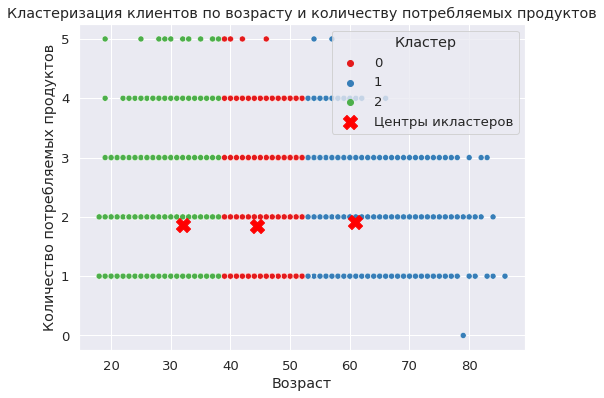



Method Hierarchical Clustering:

Cluster 0:
      userid  score       city  gender  age  equity     balance  products  \
1     146556    861    Рыбинск   False   37     5.0   850594.33         3   
3     225363    866  Ярославль   False   51     5.0  1524746.26         2   
6     177259    807  Ярославль   False   39     3.0   405042.44         3   
7     218868    825  Ярославль   False   38     4.0   458145.40         2   
10    148929    927     Ростов    True   52     0.0         NaN         1   
...      ...    ...        ...     ...  ...     ...         ...       ...   
9991  122366    840  Ярославль   False   44     3.0   326619.71         1   
9992  167165    813    Рыбинск    True   48     2.0   179765.62         2   
9993  219924    884    Рыбинск   False   36     0.0         NaN         1   
9994  114186    851     Ростов    True   42     3.0   370912.79         2   
9996  139170    894  Ярославль    True   46     0.0         NaN         1   

      credit_card  last_activ

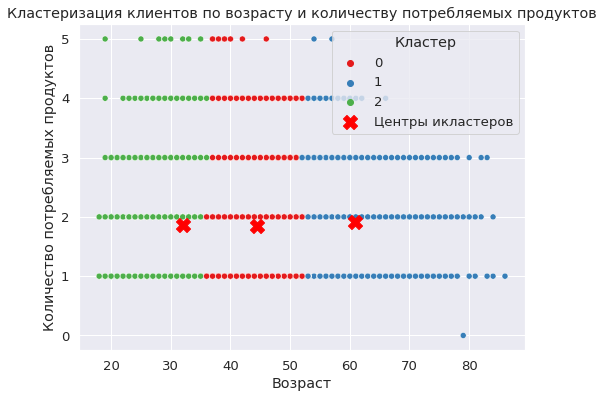



Method Gaussian Mixture Models (GMM):

Cluster 0:
      userid  score       city  gender  age  equity    balance  products  \
0     183012    850    Рыбинск   False   25     1.0   59214.82         2   
1     146556    861    Рыбинск   False   37     5.0  850594.33         3   
6     177259    807  Ярославль   False   39     3.0  405042.44         3   
12    132970    845  Ярославль   False   31     3.0  591928.52         2   
13    166357    837    Рыбинск   False   28     4.0  302249.22         2   
...      ...    ...        ...     ...  ...     ...        ...       ...   
9970  175730    816    Рыбинск    True   36     4.0  477892.07         3   
9972  150126    834     Ростов    True   27     4.0  192776.27         2   
9978  218170    841  Ярославль    True   29     2.0  235287.10         2   
9985  190822    801  Ярославль    True   29     0.0   34300.30         2   
9988  158678    889  Ярославль    True   35     4.0  880534.89         4   

      credit_card  last_activity  .

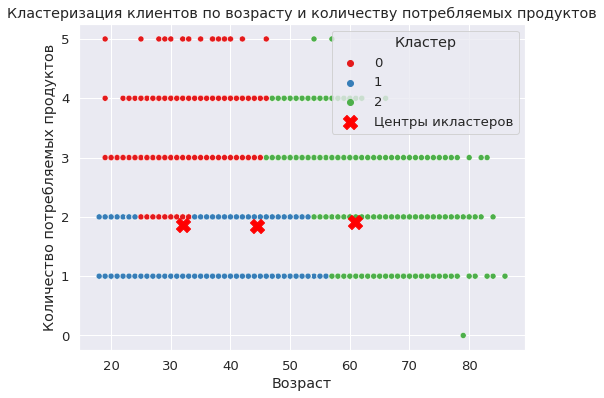



Method Mean Shift:

Cluster 0:
      userid  score       city  gender  age  equity    balance  products  \
0     183012    850    Рыбинск   False   25     1.0   59214.82         2   
1     146556    861    Рыбинск   False   37     5.0  850594.33         3   
2     120722    892    Рыбинск   False   30     0.0        NaN         1   
4     157978    730  Ярославль    True   34     5.0     174.00         1   
6     177259    807  Ярославль   False   39     3.0  405042.44         3   
...      ...    ...        ...     ...  ...     ...        ...       ...   
9991  122366    840  Ярославль   False   44     3.0  326619.71         1   
9993  219924    884    Рыбинск   False   36     0.0        NaN         1   
9994  114186    851     Ростов    True   42     3.0  370912.79         2   
9995  120553    814    Рыбинск    True   27     1.0   78144.65         1   
9997  115639    903  Ярославль    True   24     0.0        NaN         2   

      credit_card  last_activity  ...  city_Ярославль 

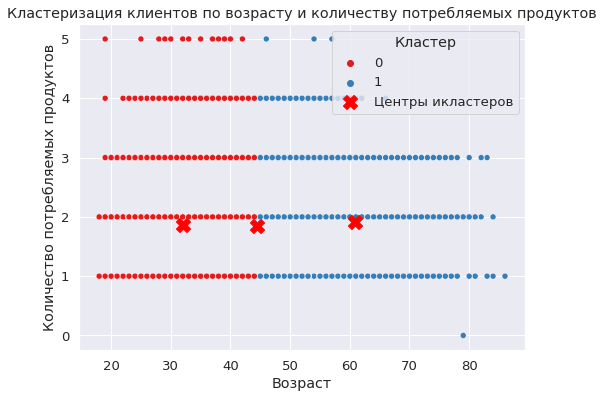

{'K-Means': {'model': KMeans(n_clusters=3, random_state=0)}}

In [80]:
def print_feature_ranges(cluster_data):
    """
    Вспомогательная функция для вывода диапазонов значений признаков в кластере.
    Аргументы:
    cluster_data - данные кластера.
    """
    print("Диапазоны значений признаков:")
    print(cluster_data[['age', 'products']].agg(['min', 'max']))


def plot_cluster(data, method_name, results):
    """
    Функция для построения графика кластеров.
    Аргументы:
    data - данные для построения.
    method_name - название метода кластеризации.
    """
    X = data[['age', 'products']]
    model = results['K-Means']['model']
    labels = model.predict(X)
    cluster_centers = model.cluster_centers_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='age', y='products', hue=method_name, palette='Set1', legend='full')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Центры икластеров')
    plt.title('Кластеризация клиентов по возрасту и количеству потребляемых продуктов')
    plt.xlabel('Возраст')
    plt.ylabel('Количество потребляемых продуктов')
    plt.legend(title='Кластер')
    plt.show()

def cluster_comparison(data):
    """
    Функция для кластеризации данных различными методами, вывода результатов с диапазонами значений признаков
    и построения графиков кластеров. DBSCAN не используем.
    Аргументы:
    data - исходные данные для кластеризации.
    """

def cluster_comparison(data):
    X = data[['age', 'products']]
    clustering_methods = {
        'K-Means': KMeans(n_clusters=3, random_state=0),
        'Hierarchical Clustering': AgglomerativeClustering(n_clusters=3),
        'Gaussian Mixture Models (GMM)': GaussianMixture(n_components=3, random_state=0),
        'Mean Shift': MeanShift()
    }

    results = {}

    for method_name, method in clustering_methods.items():
        if method_name == 'K-Means':
            results[method_name] = {}
            results[method_name]['model'] = method

        data[method_name] = method.fit_predict(X)
        print(f"\n\nMethod {method_name}:")
        
        if method_name == 'K-Means':
            print("Cluster Centers:")
            for center in method.cluster_centers_:
                print(center)
        
        for cluster_num in set(data[method_name]):
            cluster_data = data[data[method_name] == cluster_num]
            print(f"\nCluster {cluster_num}:")
            print(cluster_data)
            # Additional functionalities can be included here
        
        plot_cluster(data, method_name, results)

    return results
    print('====================================')

# Применяем функцию
cluster_comparison(df)

__Результат__<br>
1. Выбранные методы кластеризации клиентов по возрасту и количеству потребляемых продуктов дали следующие результаты.

- `K-Means`:
   - Кластер 0 - 3270 клиентов от 36 до 50 лет с количеством продуктов от 1 до 5;
   - Кластер 1 - 2298 клиентов от 51 до 60 лет с количеством продуктов от 1 до 4;
   - Кластер 2 - 4441 клиентов от 18 до 35 лет с количеством продуктов от 1 до 4;
- `Hierarchical Clustering` (),
   - Кластер 0 - 4106 клиентов от 32 до 50 лет с количеством продуктов от 1 до 5;
   - Кластер 1 - 2382 клиентов от 50 до 76 лет с количеством продуктов от 1 до 5;
   - Кластер 2 - 2656 клиентов от 18 до 34 лет с количеством продуктов от 1 до 5;
- `Gaussian Mixture Models` (),
   - Кластер 0 - 2098 клиентов от 47 до 76 лет с количеством продуктов от 1 до 5;
   - Кластер 1 - 1205 клиентов от 19 до 48 лет с количеством продуктов от 2 до 5;
   - Кластер 2 - 5841 клиентов от 18 до 54 лет с количеством продуктов от 1 до 2;
- `Mean Shift` ()
   - Кластер 0 - 5756 клиентов от 18 до 44 лет с количеством продуктов от 1 до 5;
   - Кластер 1 - 3388 клиентов от 45 до 76 лет с количеством продуктов от 1 до 5;
   

2. Вибираем кластеры:
   - Кластер 0 - клиенты от 24 до 37 лет, потребляемые продукты от 1 до 4.
   - Кластер 1 - от 52 до 68 лет, продукты от 1 до 4.
   - Кластер 2 - от 38 до 48 лет, от 1 до 3 продуктов.

#### Сегментация

Для поиска наиболее подходящих по оттоку сегментов в найденных кластерах напишем функцию.

In [81]:
def find_optimal_segments(conditions, df):
    """
    Функция для поиска сегментов c наибольшим уровнем оттока на основе определённых условий.
    Аргументы:
    conditions: список строковых условий для сегментации данных;
    Возвращает наилучшие сегменты и их метрики.
    """

    gauge_churn = df['churn'].mean()

    # Вычисление оттока сегмента и проверка размера
    def query_churn_mean(q):
        if not q:
            return 0
    
        cm = df.query(q).agg({"churn": ['mean', 'count']}).values
        if not 500 <= cm[1] <= 5000:
            return 0
    
        return round(cm[0][0], 2)
    
    # Объединение признаков в сегмент
    def query_concat(segments, op=' and '):
        return op.join(filter(None, segments))
    
    # Объединение сегментов в один запрос
    def query_concat_or(segments):
        return ' or '.join(['(' + segment + ')' for segment in segments if segment])
    
    best_k = 0
    best_q = ''
    i = 0


    for x in itertools.permutations(range(len(conditions)), 3):
        for y in itertools.permutations(range(len(conditions)), 3):
            for z in itertools.permutations(range(len(conditions)), 3):
                i += 1
                if i > 1000:
                    break

                conditions_xyz = [x, y, z]
                segments = []
                for segment_x in conditions_xyz:
                    # Формирование сегментов на основе комбинаций условий
                    segment = ' and '.join([conditions[idx] for idx in segment_x if idx < len(conditions)])
                    segments.append(segment)

                # Вычисление критериев сегментации
                q1_k = query_churn_mean(segments[0])
                q2_k = query_churn_mean(segments[1])
                q3_k = query_churn_mean(segments[2])

                if q1_k > 2 * gauge_churn and q2_k > 2 * gauge_churn and q3_k > 2 * gauge_churn:
                    # Объединение отточных сегментов в один запрос
                    q = query_concat_or(segments)
                    t_k = query_churn_mean(q)

                    if t_k > best_k:
                        best_q = q
                        best_k = t_k
                        # Вывод информации о найденных сегментах
                        print('Найден сегмент с уровнем оттока:', best_k, '(', q1_k, q2_k, q3_k, '); \nСреднее количество уходящих клиентов:', df.query(best_q)['churn'].sum())
                        print('Сегменты:\n', best_q.replace(" or ", "\n "), '\n')

    print('Итераций для завершения:', i)

Проверим, есть ли сегменты, максимально подверженные оттоку по выбранным признакам:
- баллы кредитного рейтинга от 850 до 900,
- баланс на счёте от 500-750 тыс. руб.,
- оценочный доход клиента от 85 до 110 тыс. руб.,
- возраст от 24 до 37, либо от 52 до 68 лет,
- от 3 до 5 баллов собственности,
- количество продуктов 1-4,
- пол мужчина,
- есть кредитная карта,
- финансово активные.

In [82]:
# Вводим параметры кластаров 0 и 1
conditions = [
    '3 <= equity <= 5' ,
    'last_activity == 1',
    'male == 1',
    '85000 <= est_salary <= 110000',
    'credit_card == 1',
    '1 <= products <= 4',
    '24 <= age <= 37',
    '52 <= age <= 68',
    '850 <= score <= 900',
    '500000 <= balance <= 750000'
]

# Применяем функцию
find_optimal_segments(conditions, df)

Найден сегмент с уровнем оттока: 0.45 ( 0.45 0.45 0.45 ); 
Среднее количество уходящих клиентов: 593
Сегменты:
 (3 <= equity <= 5 and last_activity == 1 and male == 1)
 (3 <= equity <= 5 and last_activity == 1 and male == 1)
 (3 <= equity <= 5 and last_activity == 1 and male == 1) 

Итераций для завершения: 519399


Получился один сегмент с высоким процентом оттока - 45%, в который попали 593 человека. Это фиинансово обеспеченные и активные мужчины с кредитным рейтингом 850-900 и баллами собственнгости от 3 до 5.

In [83]:
# Для кластера 2 изменим баллы собственности до минимума, увеличим доход и расширим баланс
conditions = [
    'equity >= 1' ,
    'last_activity == 1',
    'male == 1',
    '150000 <= est_salary <= 300000',
    'credit_card == 1',
    '1 <= products <= 3',
    '38 <= age <= 48',
    '850 <= score <= 900',
    'balance > 300000'
]

# Применяем функцию
find_optimal_segments(conditions, df)

Найден сегмент с уровнем оттока: 0.41 ( 0.41 0.41 0.41 ); 
Среднее количество уходящих клиентов: 748
Сегменты:
 (equity >= 1 and last_activity == 1 and male == 1)
 (equity >= 1 and last_activity == 1 and male == 1)
 (equity >= 1 and last_activity == 1 and male == 1) 

Найден сегмент с уровнем оттока: 0.42 ( 0.41 0.41 0.55 ); 
Среднее количество уходящих клиентов: 980
Сегменты:
 (equity >= 1 and last_activity == 1 and male == 1)
 (equity >= 1 and last_activity == 1 and male == 1)
 (last_activity == 1 and 850 <= score <= 900 and balance > 300000) 

Итераций для завершения: 255015


Во втором кластере мы получили ещё 2 сегмента с высоким процентом оттока: 41% и 42%, которые включают в себя 748 и 980 человек. Это мужчины 38-48 лет с высокими доходами: 150-300 тыс. руб., и балансом на счёте более 300 тыс., кредитный рейтинг 850-900.

In [84]:
# Вводим параметры мужчин другого возраста с меньшим уровнем дохода и рейтингом
conditions = [
    '2 <= equity <= 5' ,
    'last_activity == 1',
    'gender == 1',
    '55000 <= est_salary <= 110000',
    'credit_card == 1',
    '1 <= products <= 4',
    '38 <= age <= 47',
    '550 <= score <= 900',
    '25000 <= balance <= 100000'
]

# Применяем функцию
find_optimal_segments(conditions, df)

Найден сегмент с уровнем оттока: 0.42 ( 0.42 0.42 0.42 ); 
Среднее количество уходящих клиентов: 657
Сегменты:
 (2 <= equity <= 5 and last_activity == 1 and gender == 1)
 (2 <= equity <= 5 and last_activity == 1 and gender == 1)
 (2 <= equity <= 5 and last_activity == 1 and gender == 1) 

Итераций для завершения: 255015


Уровень оттока 42% (657 человек) у финансово активных мужчин возрастом 38-47 лет, которые пользуются 1-4 продуктами, включая кредитную карту, имеют доход 55-110 тыс. руб, баланс на счёте от 25 тыс. до 100 тыс., баллы собственности 2-5.

Напишем функцию проверки разных комбинаций сегментов по наличию кредитки, возраста, доходов, кредитного рейтинга и  т.п.

In [85]:
def churn_analysis(df, conditions):
    """
    Функция для анализа уровня оттока клиентов на основе комбинаций различных условий.
    Аргументы:
    conditions - список словарей с единичными условиями для анализа.
    Каждый словарь conditions имеет ключ 'filter' с eдиничным условием для фильтрации данных.
    """
    # Создание списка всех единичных условий
    all_filters = [cond['filter'] for cond in conditions]

    # Генерация всех возможных комбинаций условий
    all_combinations = []
    for r in range(1, len(all_filters) + 1):
        all_combinations.extend(list(itertools.combinations(all_filters, r)))

    # Проход по всем комбинациям условий
    for combination in all_combinations:
        # Объединение условий в строку
        combined_filters = ' & '.join(list(combination))

        # Применение комбинированных условий к данным
        filtered_data = df.query(combined_filters)

        # Вычисление статистик уровня оттока
        churn_mean = filtered_data['churn'].mean()
        churn_count = filtered_data['churn'].sum()
        total_count = filtered_data['churn'].count()

        # Вывод результатов анализа
        print(f"Условие: {combined_filters}")
        print(f"Средний уровень оттока: {churn_mean}")
        print(f"Количество уходящих клиентов: {churn_count}")
        print(f"Общее количество клиентов: {total_count}")
        print("--------------------")

In [86]:
# Провеврим комбинации условий
condition = [
    {'filter': "credit_card == 0"},
    {'filter': "50 < age <= 60"},
    {'filter': "2 <= equity <= 5"},
    {'filter': "est_salary >= 150000"},
    {'filter': "balance > 300000"},
]

churn_analysis(df, condition)

Условие: credit_card == 0
Средний уровень оттока: 0.25563204005006257
Количество уходящих клиентов: 817
Общее количество клиентов: 3196
--------------------
Условие: 50 < age <= 60
Средний уровень оттока: 0.2737642585551331
Количество уходящих клиентов: 432
Общее количество клиентов: 1578
--------------------
Условие: 2 <= equity <= 5
Средний уровень оттока: 0.2402954581172403
Количество уходящих клиентов: 1529
Общее количество клиентов: 6363
--------------------
Условие: est_salary >= 150000
Средний уровень оттока: 0.1934002869440459
Количество уходящих клиентов: 674
Общее количество клиентов: 3485
--------------------
Условие: balance > 300000
Средний уровень оттока: 0.2594914663880181
Количество уходящих клиентов: 1490
Общее количество клиентов: 5742
--------------------
Условие: credit_card == 0 & 50 < age <= 60
Средний уровень оттока: 0.3660436137071651
Количество уходящих клиентов: 235
Общее количество клиентов: 642
--------------------
Условие: credit_card == 0 & 2 <= equity <= 

In [87]:
# Провеврим другие комбинации условий
condition = [
    {'filter': "25 < age <= 35"},
    {'filter': "800 <= score <= 950"},
    {'filter': "last_activity == 1"},
]

churn_analysis(df, condition)

Условие: 25 < age <= 35
Средний уровень оттока: 0.21749571183533448
Количество уходящих клиентов: 634
Общее количество клиентов: 2915
--------------------
Условие: 800 <= score <= 950
Средний уровень оттока: 0.2162312395775431
Количество уходящих клиентов: 1556
Общее количество клиентов: 7196
--------------------
Условие: last_activity == 1
Средний уровень оттока: 0.24412607449856732
Количество уходящих клиентов: 1278
Общее количество клиентов: 5235
--------------------
Условие: 25 < age <= 35 & 800 <= score <= 950
Средний уровень оттока: 0.2641421224871435
Количество уходящих клиентов: 565
Общее количество клиентов: 2139
--------------------
Условие: 25 < age <= 35 & last_activity == 1
Средний уровень оттока: 0.31875792141951836
Количество уходящих клиентов: 503
Общее количество клиентов: 1578
--------------------
Условие: 800 <= score <= 950 & last_activity == 1
Средний уровень оттока: 0.3076923076923077
Количество уходящих клиентов: 1140
Общее количество клиентов: 3705
-------------

In [88]:
# Ещё комбинации условий
condition = [
    {'filter': "18 < age <= 35"},
    {'filter': "600 <= score <= 800"},
    {'filter': "products == 1"},
]

churn_analysis(df, condition)

Условие: 18 < age <= 35
Средний уровень оттока: 0.212019524100061
Количество уходящих клиентов: 695
Общее количество клиентов: 3278
--------------------
Условие: 600 <= score <= 800
Средний уровень оттока: 0.08807865628840639
Количество уходящих клиентов: 215
Общее количество клиентов: 2441
--------------------
Условие: products == 1
Средний уровень оттока: 0.07033822208919485
Количество уходящих клиентов: 235
Общее количество клиентов: 3341
--------------------
Условие: 18 < age <= 35 & 600 <= score <= 800
Средний уровень оттока: 0.075
Количество уходящих клиентов: 57
Общее количество клиентов: 760
--------------------
Условие: 18 < age <= 35 & products == 1
Средний уровень оттока: 0.08168761220825853
Количество уходящих клиентов: 91
Общее количество клиентов: 1114
--------------------
Условие: 600 <= score <= 800 & products == 1
Средний уровень оттока: 0.05207100591715976
Количество уходящих клиентов: 44
Общее количество клиентов: 845
--------------------
Условие: 18 < age <= 35 & 60

In [89]:
# Ещё комбинации условий
condition = [
    {'filter': "24 < age <= 37"},
    {'filter': "1 <= products <= 4"},
]

churn_analysis(df, condition)

Условие: 24 < age <= 37
Средний уровень оттока: 0.20666494445879618
Количество уходящих клиентов: 800
Общее количество клиентов: 3871
--------------------
Условие: 1 <= products <= 4
Средний уровень оттока: 0.1814629258517034
Количество уходящих клиентов: 1811
Общее количество клиентов: 9980
--------------------
Условие: 24 < age <= 37 & 1 <= products <= 4
Средний уровень оттока: 0.2064232064232064
Количество уходящих клиентов: 797
Общее количество клиентов: 3861
--------------------


In [90]:
# Ещё комбинации условий
condition = [
    {'filter': "age >= 40"},
    {'filter': "products >= 3"},
]

churn_analysis(df, condition)

Условие: age >= 40
Средний уровень оттока: 0.16717674062739096
Количество уходящих клиентов: 874
Общее количество клиентов: 5228
--------------------
Условие: products >= 3
Средний уровень оттока: 0.39490861618798956
Количество уходящих клиентов: 605
Общее количество клиентов: 1532
--------------------
Условие: age >= 40 & products >= 3
Средний уровень оттока: 0.37271619975639464
Количество уходящих клиентов: 306
Общее количество клиентов: 821
--------------------


In [91]:
# Провеврим комбинации условий
condition = [
    {'filter': "850 <= score <= 900"},
    {'filter': "50 <= age <= 60"},
    {'filter': "25 <= age <= 35"},
    {'filter': "3 <= equity <= 5"},
    {'filter': "85000 <= est_salary <= 110000"},
    {'filter': "250000 >= balance >= 300000"},
    {'filter': "2 <= products <= 5"},
]

churn_analysis(df, condition)

Условие: 850 <= score <= 900
Средний уровень оттока: 0.2642752562225476
Количество уходящих клиентов: 722
Общее количество клиентов: 2732
--------------------
Условие: 50 <= age <= 60
Средний уровень оттока: 0.2647058823529412
Количество уходящих клиентов: 468
Общее количество клиентов: 1768
--------------------
Условие: 25 <= age <= 35
Средний уровень оттока: 0.2176759410801964
Количество уходящих клиентов: 665
Общее количество клиентов: 3055
--------------------
Условие: 3 <= equity <= 5
Средний уровень оттока: 0.25663716814159293
Количество уходящих клиентов: 1363
Общее количество клиентов: 5311
--------------------
Условие: 85000 <= est_salary <= 110000
Средний уровень оттока: 0.18398876404494383
Количество уходящих клиентов: 262
Общее количество клиентов: 1424
--------------------
Условие: 250000 >= balance >= 300000
Средний уровень оттока: nan
Количество уходящих клиентов: 0
Общее количество клиентов: 0
--------------------
Условие: 2 <= products <= 5
Средний уровень оттока: 0.23

In [92]:
# Ещё комбинации условий
condition = [
    {'filter': "products >= 4"},
]

churn_analysis(df, condition)

Условие: products >= 4
Средний уровень оттока: 0.6247464503042597
Количество уходящих клиентов: 308
Общее количество клиентов: 493
--------------------


Выбираем сегменты по возрасту, рейтингу, уровню доходов и баллам собственности.

__Сегмент 1__<br>
- Возраст 50-60 лет<br>
- Кредитная карта: нет<br>
- Количество клиентов: 642<br>
- Уровень оттока: 36.6%<br>

__Сегмент 2__<br>
- Баллы собственности 2-5<br>
- Доход более 150 тыс. руб.<br>
- Баланс более 300 тыс.<br>
- Количество клиентов: 1608<br>
- Уровень оттока: 34.7%

__Сегмент 3__<br>
- Возраст 25-35 лет<br>
- Кредитный рейтинг 800-950<br>
- Активность: да<br>
- Количество клиентов: 1160<br>
- Уровень оттоrf: 40%

## <a id="7"></a> Выводы
[К содержанию](#0)

Наиболее подвержены оттоку клиенты у которых:
- это мужчины (65% от всех отточных клиентов);
- средний балл собственности составляет 3-4;
- пользуются 2-3 продуктами;
- место обслуживания Ярославль;
- у четверти клиентов положительный баланс на счёте медианным размером 782 410.47 руб.;
- медианный возраст 39 лет;
- иедианный дохож - 125 390.62 руб.

Проверка гипотез показала, что:
- кредитный рейтинг уходящих клиентов не отличается от рейтинга верных;
- средние доходы отточных и неотточных клиентов равны;
- отток не зависит от города клиента;
- средний возраст клиентов не влияет на отток.

## <a id="8"></a> Рекомендации
[К содержанию](#0)


Сегмент 1: возраст 50-60 лет, нет кредитной карты (количество клиентов: 570, уровень оттока: 34%)<br>
__*Можно предложить кредитную карту.*__

Сегмент 2: баллы собственности 2-5, доход более 150 тыс. руб., баланс более 300 тыс. руб. (количество клиентов: 1277, уровень оттока: 31%)<br>
__*Предложить индивидуальные условия по дебетовым счетам и страхование собственности.*__

Сегмент 3: возраст 25-35 лет, кредитный рейтинг 800-950, активность: да (количество клиентов: 1087, уровень оттока: 39%)<br>
__*Предложить кредит: ипотеку, автокредит и т.п.*__


Дополнительные рекомендации:
- клиентам с 1 продуктом нужно активно предлагать дополнительные продукты (клиенты с двумя продуктами наименее подвержены оттоку);
- для клиентов с кредитным рейтингом ниже 400 надо разработать новый продукт;
- для молодых клиентов с 2 продуктами разработать новые продукты и условия;
- клиентам с 3 продуктами повысить качество обслуживания;
- у клиентов с 4 и более продуктами выяснить причину оттока, возможно, это что-то одно: продукт или услуга, может какие-то моменты в обслуживании;
- для клиентов с балансом на счёте более 1 млн рублей разработать новые условия вкладов, предложить инвестиционные инструменты.